In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import re
import pprint

import folium
from folium.plugins import MarkerCluster
import googlemaps
import geopandas as gpd

import chart_studio
chart_studio.tools.set_credentials_file(username='error-_-', api_key='TuIkGS2vNWmn3D5mwRmX')

import requests
import json
import time

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
bus_time_table = pd.read_csv('./datasets/bus_time_table.csv', encoding='cp949', sep=',', parse_dates=['기준_날짜'])
bus_time_table.isna().sum()

기준_날짜            0
행정동_ID           0
버스_승객_수        424
버스_승객_수_00시    424
버스_승객_수_01시    424
버스_승객_수_02시    424
버스_승객_수_03시    424
버스_승객_수_04시    424
버스_승객_수_05시    424
버스_승객_수_06시    424
버스_승객_수_07시    424
버스_승객_수_08시    424
버스_승객_수_09시    424
버스_승객_수_10시    424
버스_승객_수_11시    424
버스_승객_수_12시    424
버스_승객_수_13시    424
버스_승객_수_14시    424
버스_승객_수_15시    424
버스_승객_수_16시    424
버스_승객_수_17시    424
버스_승객_수_18시    424
버스_승객_수_19시    424
버스_승객_수_20시    424
버스_승객_수_21시    424
버스_승객_수_22시    424
버스_승객_수_23시    424
dtype: int64

In [3]:
# 결측치 2022-12-18 삭제
del_idx = bus_time_table[bus_time_table.isna().values == True].index
bus_time_table = bus_time_table.drop(del_idx, axis=0)
bus_time_table.isna().sum()[bus_time_table.isna().sum()>0]

Series([], dtype: int64)

In [4]:
# 승객수 시간별 총합이 버스 승객수가 맞는지 확인
bus_time_table[bus_time_table[['버스_승객_수_00시', '버스_승객_수_01시',
       '버스_승객_수_02시', '버스_승객_수_03시', '버스_승객_수_04시', '버스_승객_수_05시',
       '버스_승객_수_06시', '버스_승객_수_07시', '버스_승객_수_08시', '버스_승객_수_09시',
       '버스_승객_수_10시', '버스_승객_수_11시', '버스_승객_수_12시', '버스_승객_수_13시',
       '버스_승객_수_14시', '버스_승객_수_15시', '버스_승객_수_16시', '버스_승객_수_17시',
       '버스_승객_수_18시', '버스_승객_수_19시', '버스_승객_수_20시', '버스_승객_수_21시',
       '버스_승객_수_22시', '버스_승객_수_23시']].sum(axis=1) != bus_time_table['버스_승객_수']]

,기준_날짜,행정동_ID,버스_승객_수,버스_승객_수_00시,버스_승객_수_01시,버스_승객_수_02시,버스_승객_수_03시,버스_승객_수_04시,버스_승객_수_05시,버스_승객_수_06시,...,버스_승객_수_14시,버스_승객_수_15시,버스_승객_수_16시,버스_승객_수_17시,버스_승객_수_18시,버스_승객_수_19시,버스_승객_수_20시,버스_승객_수_21시,버스_승객_수_22시,버스_승객_수_23시


#######################

In [5]:
# 컬럼명 변경
bus = pd.DataFrame()
bus['busdate'] = bus_time_table['기준_날짜']
bus['yy'] = bus_time_table['기준_날짜'].dt.year
bus['mm'] = bus_time_table['기준_날짜'].dt.month
bus['dd'] = bus_time_table['기준_날짜'].dt.day
bus['dong_id'] = bus_time_table['행정동_ID']
bus['guest_cnt'] = bus_time_table['버스_승객_수']
bus[['hh00', 'hh01',
       'hh02', 'hh03', 'hh04', 'hh05',
       'hh06', 'hh07', 'hh08', 'hh09',
       'hh10', 'hh11', 'hh12', 'hh13',
       'hh14', 'hh15', 'hh16', 'hh17',
       'hh18', 'hh19', 'hh20', 'hh21',
       'hh22', 'hh23']] = bus_time_table[['버스_승객_수_00시', '버스_승객_수_01시',
       '버스_승객_수_02시', '버스_승객_수_03시', '버스_승객_수_04시', '버스_승객_수_05시',
       '버스_승객_수_06시', '버스_승객_수_07시', '버스_승객_수_08시', '버스_승객_수_09시',
       '버스_승객_수_10시', '버스_승객_수_11시', '버스_승객_수_12시', '버스_승객_수_13시',
       '버스_승객_수_14시', '버스_승객_수_15시', '버스_승객_수_16시', '버스_승객_수_17시',
       '버스_승객_수_18시', '버스_승객_수_19시', '버스_승객_수_20시', '버스_승객_수_21시',
       '버스_승객_수_22시', '버스_승객_수_23시']].astype('int')

bus = bus.sort_values(['busdate','yy','mm','dd'])
bus

,busdate,yy,mm,dd,dong_id,guest_cnt,hh00,hh01,hh02,hh03,...,hh14,hh15,hh16,hh17,hh18,hh19,hh20,hh21,hh22,hh23
173416,2022-01-01,2022,1,1,1124082,4441.0,10,18,7,3,...,335,362,371,321,210,193,179,272,181,33
173417,2022-01-01,2022,1,1,1124081,4707.0,17,33,21,1,...,315,389,373,367,353,263,257,328,205,42
173418,2022-01-01,2022,1,1,1106091,3076.0,3,0,0,0,...,231,266,241,220,142,141,139,176,89,42
173419,2022-01-01,2022,1,1,1111079,4418.0,32,13,7,10,...,292,300,321,322,317,222,252,364,238,80
173420,2022-01-01,2022,1,1,1121069,11695.0,48,6,7,7,...,701,715,844,892,848,811,887,1445,789,336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,2023-02-15,2023,2,15,1110061,5170.0,13,0,0,0,...,267,227,261,308,333,227,149,129,76,56
420,2023-02-15,2023,2,15,1110060,7534.0,21,4,1,1,...,362,321,326,417,503,334,191,202,150,72
421,2023-02-15,2023,2,15,1110056,4684.0,18,0,2,0,...,272,271,248,221,280,193,117,96,66,34
422,2023-02-15,2023,2,15,1115069,6300.0,18,0,0,0,...,501,409,355,425,569,310,319,324,322,116


컬럼명      wd
공휴일+주말  1 
평일        0

In [6]:
공휴일22_23 = ['2022-01-01', '2022-01-31', '2022-02-01', '2022-02-02', '2022-03-01', '2022-03-09', '2022-05-05', '2022-05-08', '2022-06-01', '2022-06-06', '2022-08-15', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-10-03', '2022-10-09', '2022-10-10', '2022-12-25', '2023-01-01', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24']
bus['busdate'].isin(공휴일22_23)

173416     True
173417     True
173418     True
173419     True
173420     True
          ...  
419       False
420       False
421       False
422       False
423       False
Name: busdate, Length: 173416, dtype: bool

In [7]:
# bus = pd.read_csv('./datasets/bus_mycol.csv', parse_dates=['busdate'])
h_arr =  bus[['hh00', 'hh01', 'hh02', 'hh03', 'hh04', 'hh05', 'hh06', 'hh07', 'hh08', 'hh09', 'hh10', 'hh11', 'hh12', 'hh13', 'hh14', 'hh15', 'hh16', 'hh17', 'hh18', 'hh19', 'hh20', 'hh21', 'hh22', 'hh23']].values.reshape(-1, order='F')
hh = np.array([[i]*bus.shape[0] for i in range(24)]).reshape(-1)
b = bus[['busdate','yy','mm','dd','dong_id','guest_cnt']]
b3 = pd.concat([pd.concat([b,b]),b])
b6 = pd.concat([b3,b3])
b12 = pd.concat([b6,b6])
b24 = pd.concat([b12,b12])
b24['ww'] = b24['busdate'].dt.dayofweek
b24['hh'] = hh
b24['g_cnt'] = h_arr
b24['guest_cnt'] = b24['guest_cnt'].astype('int')
wd22_23 = ['2022-01-01', '2022-01-31', '2022-02-01', '2022-02-02', '2022-03-01', '2022-03-09', '2022-05-05', '2022-05-08', '2022-06-01', '2022-06-06', '2022-08-15', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-10-03', '2022-10-09', '2022-10-10', '2022-12-25', '2023-01-01', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24']
b24['wd'] = np.where((b24['busdate'].isin(wd22_23))|(b24['ww']==5)|(b24['ww']==6),1,0)
b24.sort_values(['busdate', 'yy', 'mm', 'dd', 'dong_id'])
b24.shape

(4161984, 10)

In [8]:
b24.set_index(['yy','mm','dd','hh'])

busdate  dong_id  guest_cnt  ww  g_cnt  wd
yy   mm dd hh                                              
2022 1  1  0  2022-01-01  1124082       4441   5     10   1
           0  2022-01-01  1124081       4707   5     17   1
           0  2022-01-01  1106091       3076   5      3   1
           0  2022-01-01  1111079       4418   5     32   1
           0  2022-01-01  1121069      11695   5     48   1
...                  ...      ...        ...  ..    ...  ..
2023 2  15 23 2023-02-15  1110061       5170   2     56   0
           23 2023-02-15  1110060       7534   2     72   0
           23 2023-02-15  1110056       4684   2     34   0
           23 2023-02-15  1115069       6300   2    116   0
           23 2023-02-15  1115065       3592   2     46   0

[4161984 rows x 6 columns]

In [9]:
b24[b24['busdate']=='2022-01-01']['dong_id'].unique()

array([1124082, 1124081, 1106091, 1111079, 1121069, 1114076, 1113071,
       1104067, 1124065, 1121079, 1119054, 1115066, 1123053, 1122057,
       1121073, 1121054, 1120054, 1119062, 1118052, 1117055, 1116063,
       1110065, 1120052, 1115058, 1110055, 1109063, 1108071, 1107071,
       1107054, 1105067, 1104073, 1104059, 1101056, 1113076, 1113062,
       1112072, 1111059, 1103058, 1125074, 1125055, 1124064, 1123080,
       1101068, 1120071, 1119075, 1119063, 1118057, 1117065, 1116069,
       1116051, 1110057, 1102052, 1115062, 1114074, 1109072, 1108083,
       1108063, 1107065, 1106087, 1106073, 1105057, 1101061, 1114066,
       1114060, 1113066, 1112065, 1111077, 1103072, 1103052, 1125070,
       1125053, 1124053, 1101071, 1123071, 1125071, 1125065, 1125056,
       1125051, 1124077, 1124069, 1124063, 1124059, 1124055, 1124051,
       1123065, 1123051, 1123076, 1123068, 1122067, 1122063, 1122059,
       1122054, 1121083, 1121071, 1121065, 1121061, 1120073, 1120069,
       1120065, 1120

In [10]:
b24['guest_cnt'].values.reshape(-1,424)

array([[ 4441,  4707,  3076, ...,  2377,  2229,  1353],
       [ 4735,  5555,  3251, ..., 29567,  7493,  3436],
       [11434,  9600,  7287, ...,  4077,  5456,  3139],
       ...,
       [14253, 10542,  7586, ...,  4510,  5781,  3359],
       [14898, 11110,  7854, ...,  4542,  6045,  3522],
       [15015, 11184,  8005, ...,  4684,  6300,  3592]])

In [11]:
b24.pivot(index=['yy', 'mm', 'dd', 'hh'], columns='dong_id', values = 'guest_cnt')

dong_id        1101053  1101054  1101055  1101056  1101057  1101058  1101060  \
yy   mm dd hh                                                                  
2022 1  1  0      9204     1748     3508     4202      926     3960      709   
           1      9204     1748     3508     4202      926     3960      709   
           2      9204     1748     3508     4202      926     3960      709   
           3      9204     1748     3508     4202      926     3960      709   
           4      9204     1748     3508     4202      926     3960      709   
...                ...      ...      ...      ...      ...      ...      ...   
2023 2  15 19    28956     4521     8227     8780     2012    10620     2033   
           20    28956     4521     8227     8780     2012    10620     2033   
           21    28956     4521     8227     8780     2012    10620     2033   
           22    28956     4521     8227     8780     2012    10620     2033   
           23    28956     4521     8227     8780     2012    10620     2033   

dong_id        1101061  1101063  1101064  ...  1125061  1125063  1125065  \
yy   mm dd hh                             ...                              
2022 1  1  0     24600     3968     5063  ...     1839     2585     1966   
           1     24600     3968     5063  ...     1839     2585     1966   
           2     24600     3968     5063  ...     1839     2585     1966   
           3     24600     3968     5063  ...     1839     2585     1966   
           4     24600     3968     5063  ...     1839     2585     1966   
...                ...      ...      ...  ...      ...      ...      ...   
2023 2  15 19    67196    13173    15698  ...     3724     4658     5947   
           20    67196    13173    15698  ...     3724     4658     5947   
           21    67196    13173    15698  ...     3724     4658     5947   
           22    67196    13173    15698  ...     3724     4658     5947   
           23    67196    13173    15698  ...     3724     4658     5947   

dong_id        1125066  1125067  1125070  1125071  1125072  1125073  1125074  
yy   mm dd hh                                                                 
2022 1  1  0      3211     2017      657     2252     1513     5373     4381  
           1      3211     2017      657     2252     1513     5373     4381  
           2      3211     2017      657     2252     1513     5373     4381  
           3      3211     2017      657     2252     1513     5373     4381  
           4      3211     2017      657     2252     1513     5373     4381  
...                ...      ...      ...      ...      ...      ...      ...  
2023 2  15 19     6574     5003     1720     7638     3068    11116    10276  
           20     6574     5003     1720     7638     3068    11116    10276  
           21     6574     5003     1720     7638     3068    11116    10276  
           22     6574     5003     1720     7638     3068    11116    10276  
           23     6574     5003     1720     7638     3068    11116    10276  

[9816 rows x 424 columns]

In [12]:
pd.pivot_table(b24, index=['yy', 'mm', 'dd', 'hh'], columns='dong_id', values = 'guest_cnt')

dong_id        1101053  1101054  1101055  1101056  1101057  1101058  1101060  \
yy   mm dd hh                                                                  
2022 1  1  0      9204     1748     3508     4202      926     3960      709   
           1      9204     1748     3508     4202      926     3960      709   
           2      9204     1748     3508     4202      926     3960      709   
           3      9204     1748     3508     4202      926     3960      709   
           4      9204     1748     3508     4202      926     3960      709   
...                ...      ...      ...      ...      ...      ...      ...   
2023 2  15 19    28956     4521     8227     8780     2012    10620     2033   
           20    28956     4521     8227     8780     2012    10620     2033   
           21    28956     4521     8227     8780     2012    10620     2033   
           22    28956     4521     8227     8780     2012    10620     2033   
           23    28956     4521     8227     8780     2012    10620     2033   

dong_id        1101061  1101063  1101064  ...  1125061  1125063  1125065  \
yy   mm dd hh                             ...                              
2022 1  1  0     24600     3968     5063  ...     1839     2585     1966   
           1     24600     3968     5063  ...     1839     2585     1966   
           2     24600     3968     5063  ...     1839     2585     1966   
           3     24600     3968     5063  ...     1839     2585     1966   
           4     24600     3968     5063  ...     1839     2585     1966   
...                ...      ...      ...  ...      ...      ...      ...   
2023 2  15 19    67196    13173    15698  ...     3724     4658     5947   
           20    67196    13173    15698  ...     3724     4658     5947   
           21    67196    13173    15698  ...     3724     4658     5947   
           22    67196    13173    15698  ...     3724     4658     5947   
           23    67196    13173    15698  ...     3724     4658     5947   

dong_id        1125066  1125067  1125070  1125071  1125072  1125073  1125074  
yy   mm dd hh                                                                 
2022 1  1  0      3211     2017      657     2252     1513     5373     4381  
           1      3211     2017      657     2252     1513     5373     4381  
           2      3211     2017      657     2252     1513     5373     4381  
           3      3211     2017      657     2252     1513     5373     4381  
           4      3211     2017      657     2252     1513     5373     4381  
...                ...      ...      ...      ...      ...      ...      ...  
2023 2  15 19     6574     5003     1720     7638     3068    11116    10276  
           20     6574     5003     1720     7638     3068    11116    10276  
           21     6574     5003     1720     7638     3068    11116    10276  
           22     6574     5003     1720     7638     3068    11116    10276  
           23     6574     5003     1720     7638     3068    11116    10276  

[9816 rows x 424 columns]

In [13]:
b24[(b24['dong_id']==1115065)]

,busdate,yy,mm,dd,dong_id,guest_cnt,ww,hh,g_cnt,wd
173839,2022-01-01,2022,1,1,1115065,1353,5,0,5,1
173350,2022-01-02,2022,1,2,1115065,1494,6,0,2,1
172991,2022-01-03,2022,1,3,1115065,3139,0,0,4,0
172567,2022-01-04,2022,1,4,1115065,3247,1,0,6,0
172143,2022-01-05,2022,1,5,1115065,3247,2,0,6,0
...,...,...,...,...,...,...,...,...,...,...
2119,2023-02-11,2023,2,11,1115065,2516,5,23,29,1
1695,2023-02-12,2023,2,12,1115065,1778,6,23,18,1
1271,2023-02-13,2023,2,13,1115065,3359,0,23,39,0
847,2023-02-14,2023,2,14,1115065,3522,1,23,44,0


# 서울 그래프

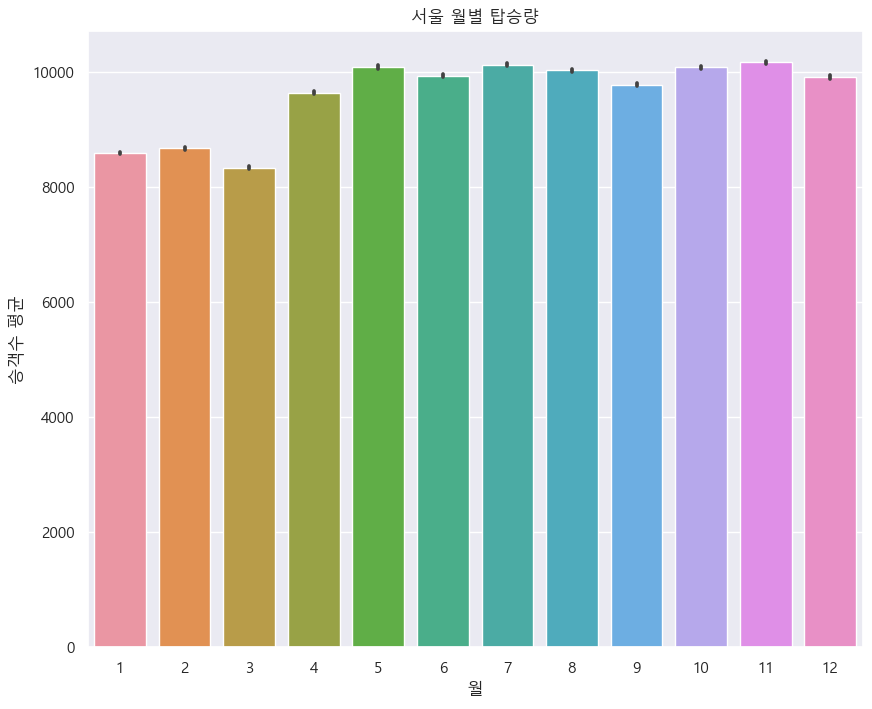

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(data=b24, x='mm', y='guest_cnt')
plt.title('서울 월별 탑승량')
plt.xlabel('월')
plt.ylabel('승객수 평균')
plt.show()

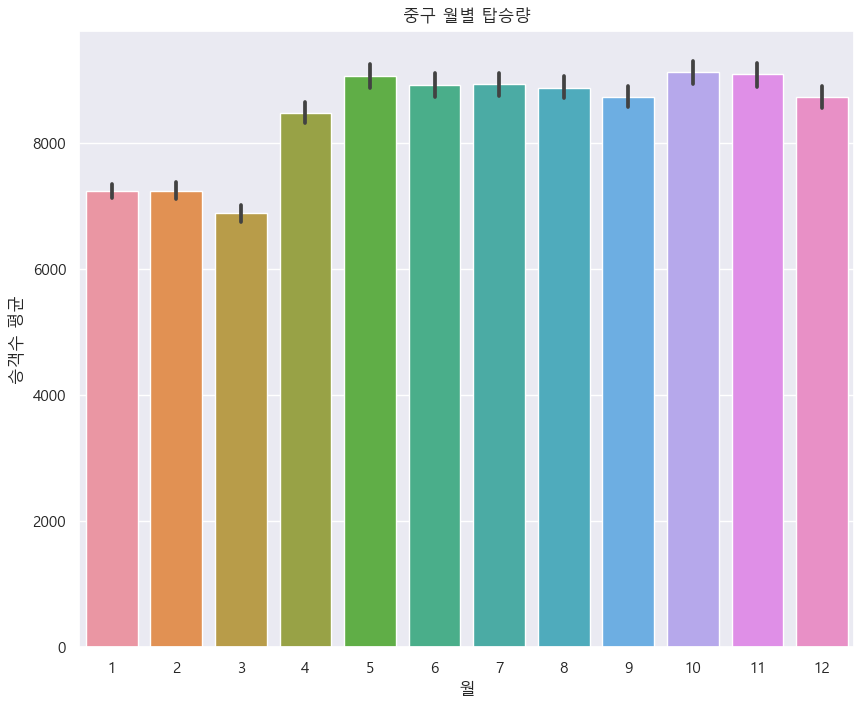

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(data=b24[b24['dong_id']//100==11020], x='mm', y='guest_cnt')
plt.title('중구 월별 탑승량')
plt.xlabel('월')
plt.ylabel('승객수 평균')
plt.show()

In [16]:
구코드 = pd.DataFrame(
    np.array([
        11010, '종로구',
        11020, '중구',
        11030, '용산구',
        11040, '성동구',
        11050, '광진구',
        11060, '동대문구',
        11070, '중랑구',
        11080, '성북구',
        11090, '강북구',
        11100, '도봉구',
        11110, '노원구',
        11120, '은평구',
        11130, '서대문구',
        11140, '마포구',
        11150, '양천구',
        11160, '강서구',
        11170, '구로구',
        11180, '금천구',
        11190, '영등포구',
        11200, '동작구',
        11210, '관악구',
        11220, '서초구',
        11230, '강남구',
        11240, '송파구',
        11250, '강동구']).reshape(-1,2),
    columns=['gu_code','구이름']
)
구코드['gu_code'] = 구코드['gu_code'].astype('int')
구코드.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   gu_code  25 non-null     int32 
 1   구이름      25 non-null     object
dtypes: int32(1), object(1)
memory usage: 428.0+ bytes


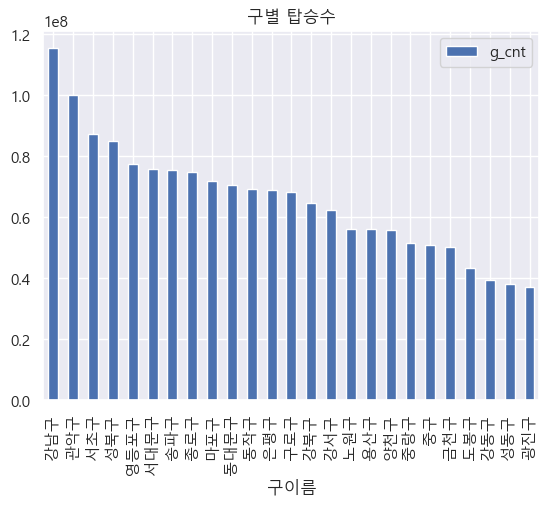

In [180]:
b24['gu_id'] = b24['dong_id']//100
bus = pd.merge(b24, 구코드, how='left', left_on='gu_id', right_on='gu_code')
bus.groupby('구이름')[['g_cnt']].sum().sort_values('g_cnt', ascending=False).plot(kind='bar')
plt.title('구별 탑승수')
plt.show()

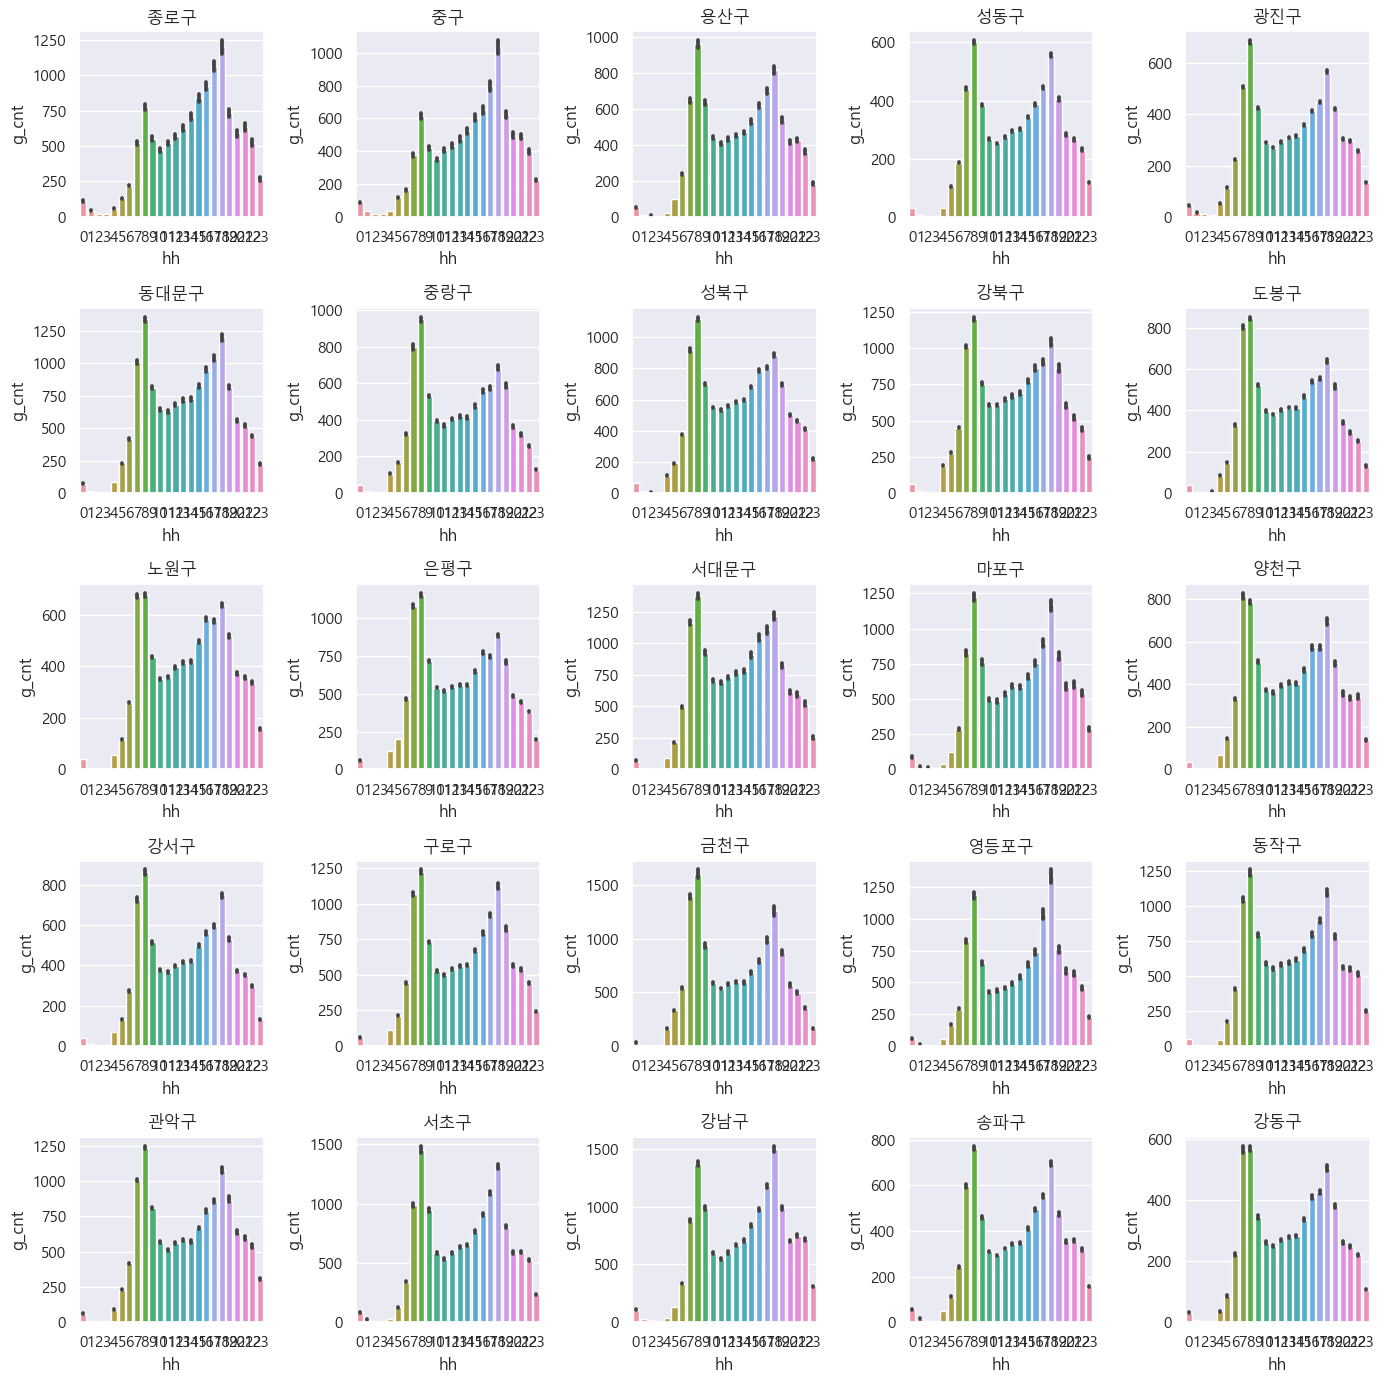

In [18]:
plt.figure(figsize=(14,14))
for i, gu in enumerate(구코드['구이름'].values):
    plt.subplot(5,5,i+1)
    plt.title(gu)
    구로구분 = bus[(bus['wd']==0)&(bus['구이름']==gu)]
    sns.barplot(data=구로구분, x='hh', y='g_cnt')
plt.tight_layout()
plt.show()

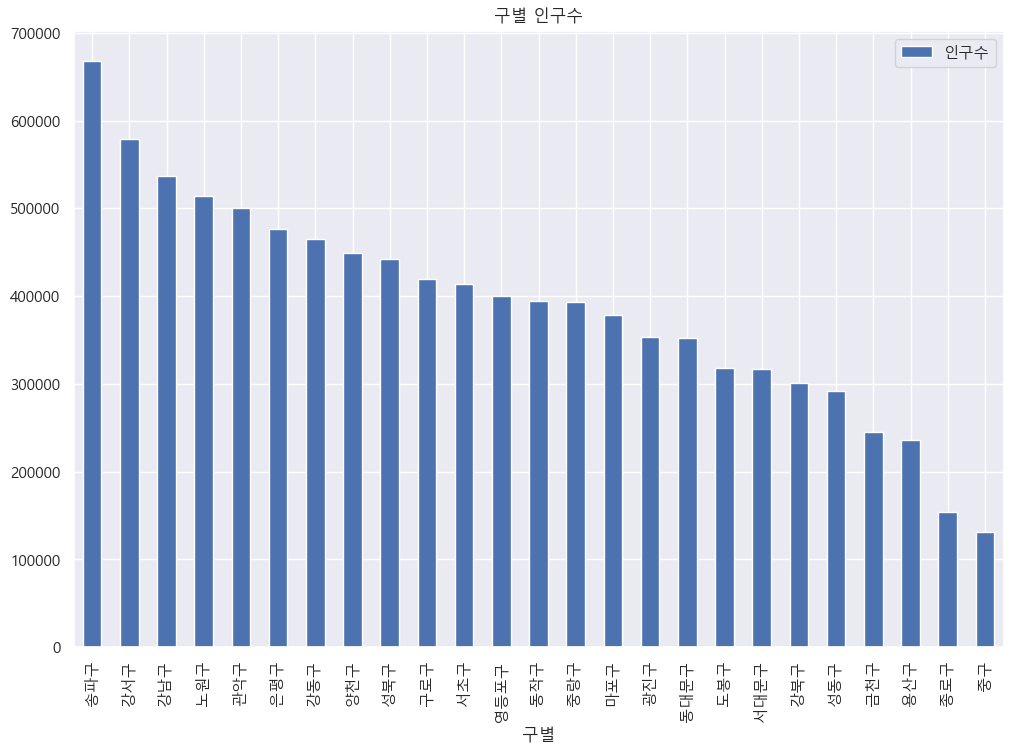

In [19]:
서울인구 = pd.read_csv('./datasets/gu_dong_population_2022_03.csv', encoding='cp949')
서울인구['인구수'] = 서울인구['소계'].str.replace(',', '').astype('int')
# 서울인구.rename(columns={'소계':'인구수'}, inplace=True)
서울인구.groupby('구별').sum().sort_values('인구수', ascending=False).plot(kind='bar', figsize=(12,8))
plt.title('구별 인구수')
plt.show()

In [20]:
bus_junggu = bus[(bus['dong_id']//100==11020)]
bus_junggu

,busdate,yy,mm,dd,dong_id,guest_cnt,ww,hh,g_cnt,wd,gu_id,gu_code,구이름
51,2022-01-01,2022,1,1,1102052,10768,5,0,56,1,11020,11020,중구
155,2022-01-01,2022,1,1,1102073,534,5,0,4,1,11020,11020,중구
156,2022-01-01,2022,1,1,1102068,1613,5,0,3,1,11020,11020,중구
157,2022-01-01,2022,1,1,1102059,5557,5,0,35,1,11020,11020,중구
158,2022-01-01,2022,1,1,1102054,12329,5,0,138,1,11020,11020,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161898,2023-02-15,2023,2,15,1102065,6033,2,23,197,0,11020,11020,중구
4161899,2023-02-15,2023,2,15,1102060,4175,2,23,150,0,11020,11020,중구
4161927,2023-02-15,2023,2,15,1102058,3973,2,23,47,0,11020,11020,중구
4161928,2023-02-15,2023,2,15,1102057,4117,2,23,87,0,11020,11020,중구


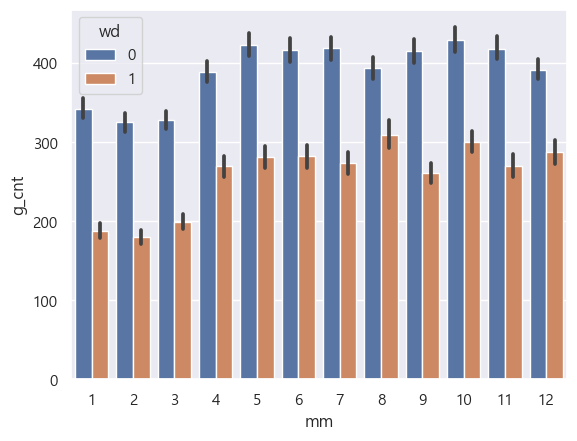

In [21]:
sns.barplot(data=bus_junggu[bus_junggu['yy']==2022], x='mm', y='g_cnt', hue='wd')
plt.show()

In [22]:
# sns.barplot(data=bus[bus['yy']==2022], x='mm', y='g_cnt', hue='wd')
# plt.show()

In [23]:
# 중구 22년 3월만
bus_junggu_3month = bus[(bus['dong_id']//100==11020)&(bus['mm']==3)].sort_values(['busdate'])
bus_junggu_3month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11160 entries, 24643 to 4026290
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   busdate    11160 non-null  datetime64[ns]
 1   yy         11160 non-null  int64         
 2   mm         11160 non-null  int64         
 3   dd         11160 non-null  int64         
 4   dong_id    11160 non-null  int64         
 5   guest_cnt  11160 non-null  int32         
 6   ww         11160 non-null  int64         
 7   hh         11160 non-null  int32         
 8   g_cnt      11160 non-null  int32         
 9   wd         11160 non-null  int32         
 10  gu_id      11160 non-null  int64         
 11  gu_code    11160 non-null  int32         
 12  구이름        11160 non-null  object        
dtypes: datetime64[ns](1), int32(5), int64(6), object(1)
memory usage: 1002.7+ KB


In [24]:
# 노원구 22년 3월만
bus_nowon_3month = bus[(bus['dong_id']//100==11110)&(bus['mm']==3)].sort_values(['busdate'])
bus_nowon_3month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14136 entries, 24595 to 4026275
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   busdate    14136 non-null  datetime64[ns]
 1   yy         14136 non-null  int64         
 2   mm         14136 non-null  int64         
 3   dd         14136 non-null  int64         
 4   dong_id    14136 non-null  int64         
 5   guest_cnt  14136 non-null  int32         
 6   ww         14136 non-null  int64         
 7   hh         14136 non-null  int32         
 8   g_cnt      14136 non-null  int32         
 9   wd         14136 non-null  int32         
 10  gu_id      14136 non-null  int64         
 11  gu_code    14136 non-null  int32         
 12  구이름        14136 non-null  object        
dtypes: datetime64[ns](1), int32(5), int64(6), object(1)
memory usage: 1.2+ MB


In [25]:
# 강남구 22년 3월만
bus_gangnam_3month = bus[(bus['dong_id']//100==11230)&(bus['mm']==3)].sort_values(['busdate'])
bus_gangnam_3month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16368 entries, 24604 to 4026280
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   busdate    16368 non-null  datetime64[ns]
 1   yy         16368 non-null  int64         
 2   mm         16368 non-null  int64         
 3   dd         16368 non-null  int64         
 4   dong_id    16368 non-null  int64         
 5   guest_cnt  16368 non-null  int32         
 6   ww         16368 non-null  int64         
 7   hh         16368 non-null  int32         
 8   g_cnt      16368 non-null  int32         
 9   wd         16368 non-null  int32         
 10  gu_id      16368 non-null  int64         
 11  gu_code    16368 non-null  int32         
 12  구이름        16368 non-null  object        
dtypes: datetime64[ns](1), int32(5), int64(6), object(1)
memory usage: 1.4+ MB


In [26]:
# 송파구 22년 3월만
bus_songpa_3month = bus[(bus['dong_id']//100==11240)&(bus['mm']==3)].sort_values(['busdate'])
bus_songpa_3month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20088 entries, 24592 to 4026279
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   busdate    20088 non-null  datetime64[ns]
 1   yy         20088 non-null  int64         
 2   mm         20088 non-null  int64         
 3   dd         20088 non-null  int64         
 4   dong_id    20088 non-null  int64         
 5   guest_cnt  20088 non-null  int32         
 6   ww         20088 non-null  int64         
 7   hh         20088 non-null  int32         
 8   g_cnt      20088 non-null  int32         
 9   wd         20088 non-null  int32         
 10  gu_id      20088 non-null  int64         
 11  gu_code    20088 non-null  int32         
 12  구이름        20088 non-null  object        
dtypes: datetime64[ns](1), int32(5), int64(6), object(1)
memory usage: 1.8+ MB


In [27]:
# 서초구 22년 3월만
bus_seocho_3month = bus[(bus['dong_id']//100==11220)&(bus['mm']==3)].sort_values(['busdate'])
bus_seocho_3month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13392 entries, 24605 to 4026252
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   busdate    13392 non-null  datetime64[ns]
 1   yy         13392 non-null  int64         
 2   mm         13392 non-null  int64         
 3   dd         13392 non-null  int64         
 4   dong_id    13392 non-null  int64         
 5   guest_cnt  13392 non-null  int32         
 6   ww         13392 non-null  int64         
 7   hh         13392 non-null  int32         
 8   g_cnt      13392 non-null  int32         
 9   wd         13392 non-null  int32         
 10  gu_id      13392 non-null  int64         
 11  gu_code    13392 non-null  int32         
 12  구이름        13392 non-null  object        
dtypes: datetime64[ns](1), int32(5), int64(6), object(1)
memory usage: 1.2+ MB


In [28]:
# 종로구 22년 3월만
bus_jongro_3month = bus[(bus['dong_id']//100==11010)&(bus['mm']==3)].sort_values(['busdate'])
bus_jongro_3month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12648 entries, 24624 to 4026300
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   busdate    12648 non-null  datetime64[ns]
 1   yy         12648 non-null  int64         
 2   mm         12648 non-null  int64         
 3   dd         12648 non-null  int64         
 4   dong_id    12648 non-null  int64         
 5   guest_cnt  12648 non-null  int32         
 6   ww         12648 non-null  int64         
 7   hh         12648 non-null  int32         
 8   g_cnt      12648 non-null  int32         
 9   wd         12648 non-null  int32         
 10  gu_id      12648 non-null  int64         
 11  gu_code    12648 non-null  int32         
 12  구이름        12648 non-null  object        
dtypes: datetime64[ns](1), int32(5), int64(6), object(1)
memory usage: 1.1+ MB


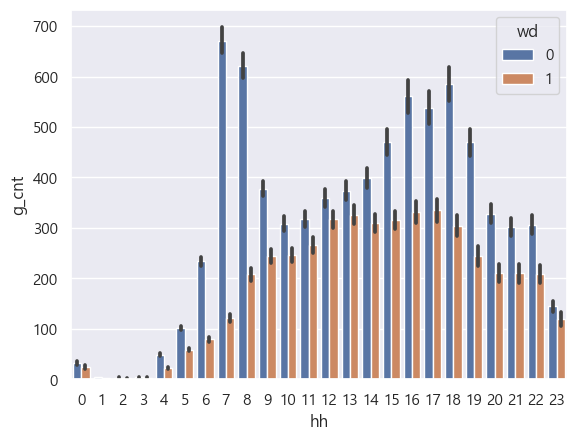

In [29]:
# plt.figure(figsize=(14,14))
sns.barplot(data=bus_nowon_3month, x='hh', y='g_cnt', hue='wd')
plt.show()

In [30]:
# # plt.figure(figsize=(14,14))
# sns.barplot(data=bus, x='hh', y='g_cnt', hue='wd')
# plt.show()

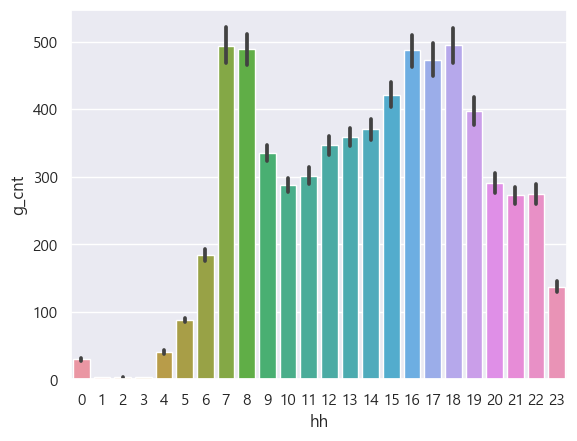

In [31]:
sns.barplot(data=bus_nowon_3month, x='hh', y='g_cnt')
plt.show()

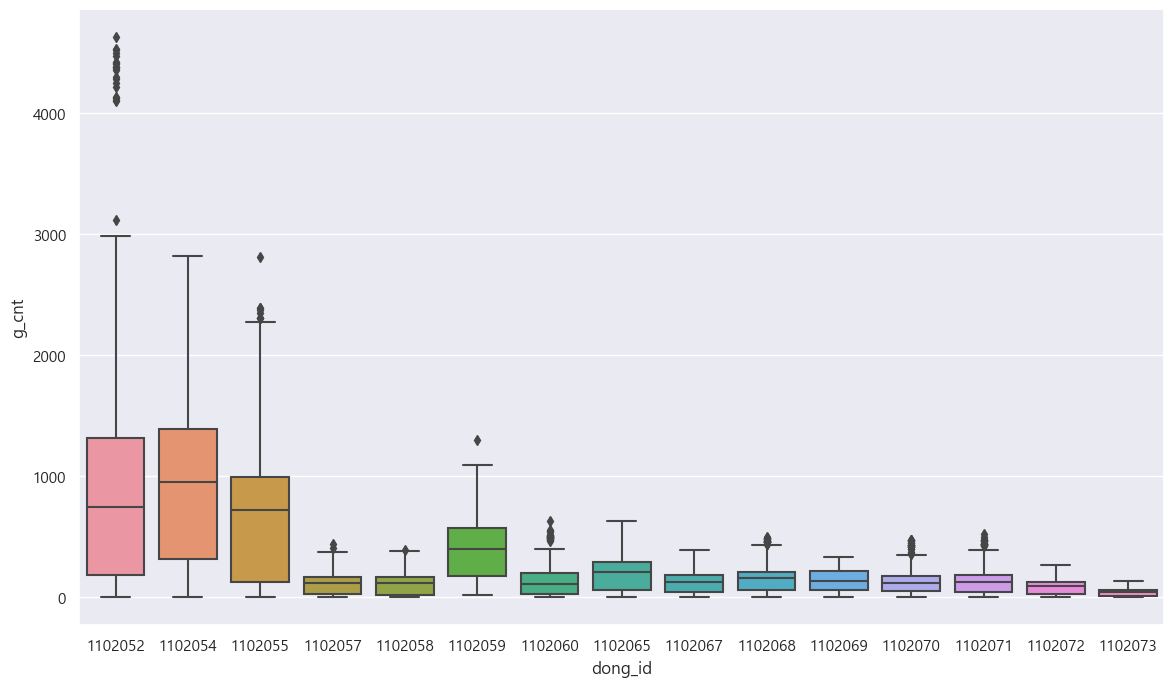

In [32]:
plt.figure(figsize=(14,8))
sns.boxplot(data=bus_junggu_3month, x='dong_id', y='g_cnt')
plt.show()

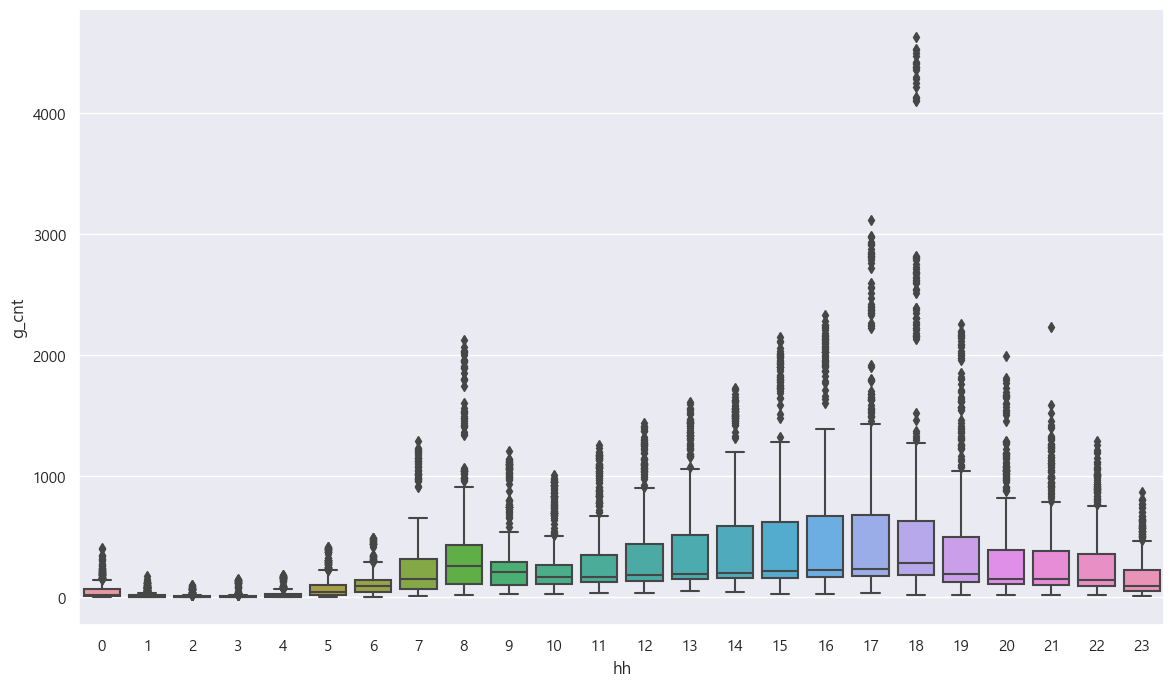

In [33]:
plt.figure(figsize=(14,8))
sns.boxplot(data=bus_junggu_3month, x='hh', y='g_cnt')
plt.show()

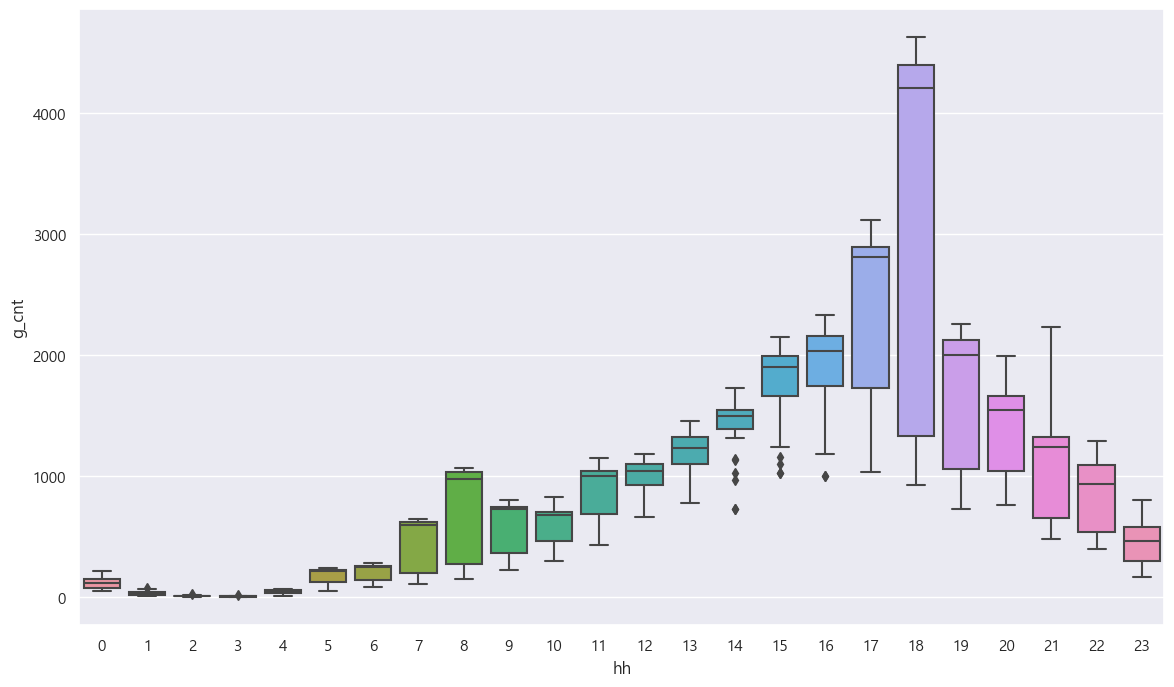

In [34]:
plt.figure(figsize=(14,8))
sns.boxplot(data=bus_junggu_3month[bus_junggu_3month['dong_id']==1102052], x='hh', y='g_cnt')
plt.show()

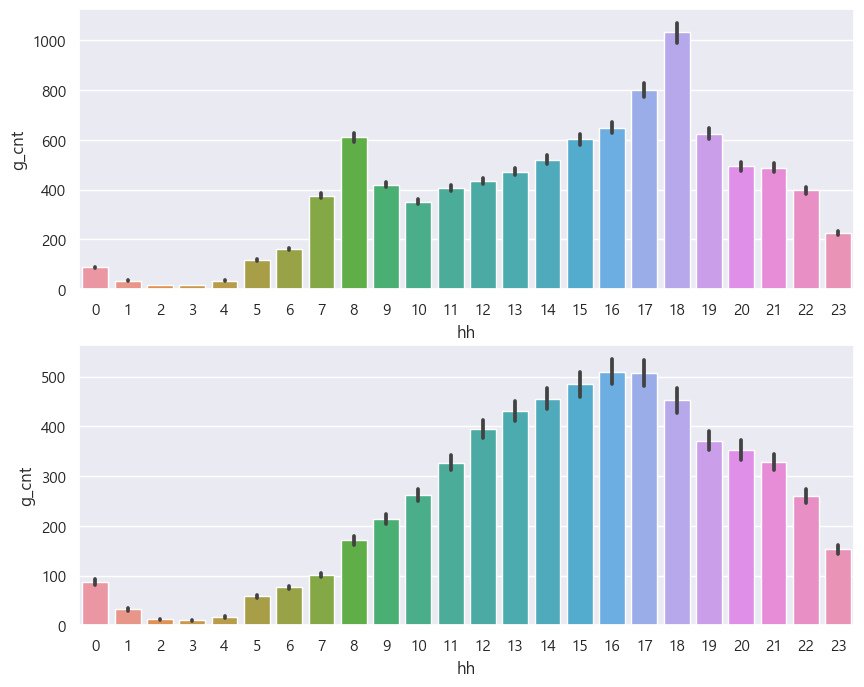

In [35]:
# 중구 3월 시간별 버스 승객량 평균
junggu_3mm = b24[b24['dong_id']//100==11020]

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.barplot(data=junggu_3mm[junggu_3mm['wd']==0], x='hh', y='g_cnt')
plt.subplot(2,1,2)
sns.barplot(data=junggu_3mm[junggu_3mm['wd']==1], x='hh', y='g_cnt')
plt.show()

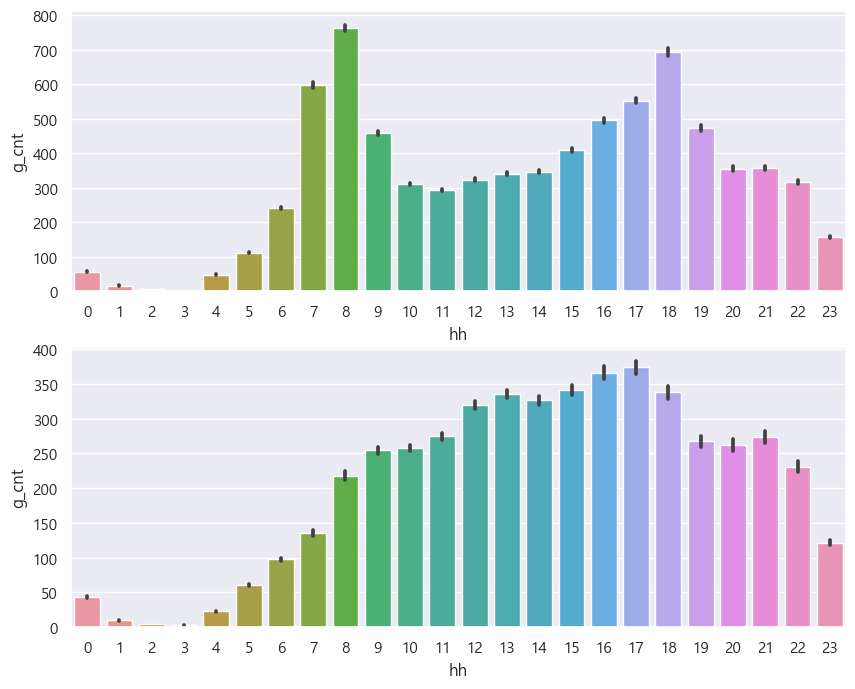

In [36]:
# 송파구 3월 시간별 버스 승객량 평균
songpa_3mm = b24[b24['dong_id']//100==11240]

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.barplot(data=songpa_3mm[songpa_3mm['wd']==0], x='hh', y='g_cnt')
plt.subplot(2,1,2)
sns.barplot(data=songpa_3mm[songpa_3mm['wd']==1], x='hh', y='g_cnt')
plt.show()

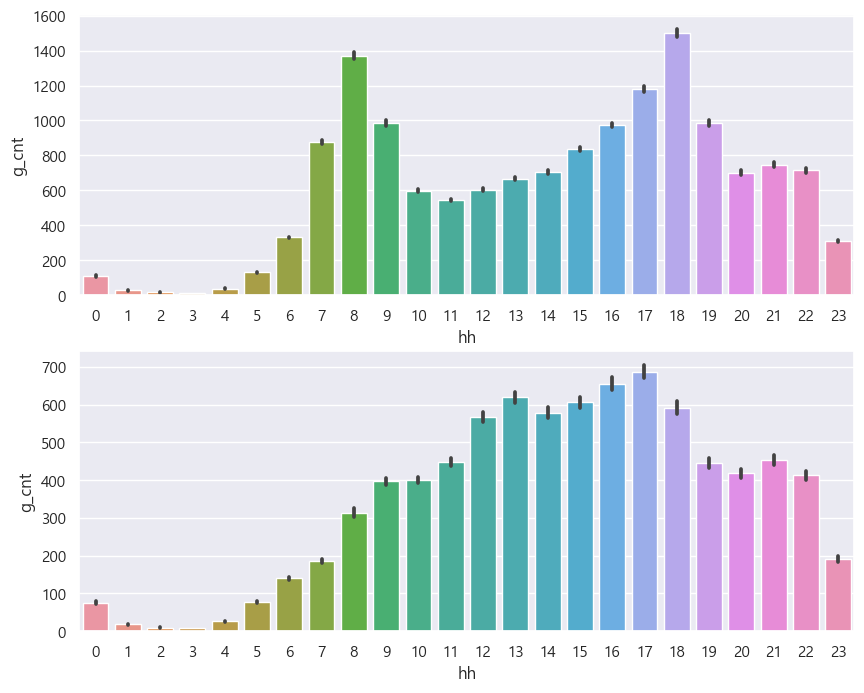

In [37]:
# 강남구 3월 시간별 버스 승객량 평균
gangnam_3mm = b24[b24['dong_id']//100==11230]

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.barplot(data=gangnam_3mm[gangnam_3mm['wd']==0], x='hh', y='g_cnt')
plt.subplot(2,1,2)
sns.barplot(data=gangnam_3mm[gangnam_3mm['wd']==1], x='hh', y='g_cnt')
plt.show()

In [38]:
# 서울geojson을 중구geojson으로 잘라서 저장

# state_geo = gpd.read_file('./datasets/seoul_geo_dong.geojson')
# junggu_geo = state_geo[ state_geo['adm_cd'].astype('int')//100 == 11020 ]

# with open('C:\\AI\\pythonProject\\venv\\lecture\\semipjt\\datasets\\junggu_geo.geojson', 'w') as f:
#     f.write(junggu_geo.to_json(drop_id=True))

In [39]:
# state_geo = gpd.read_file('./datasets/seoul_geo_dong.geojson')
# junggu_geo = state_geo[ state_geo['adm_cd'].astype('int')//100 == 11020 ]
# junggu_geo

# here = [37.560914, 126.990202]
# m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

# folium.GeoJson(junggu_geo).add_to(m)
# m

In [40]:
# state_geo = gpd.read_file('./datasets/seoul_geo_sigugun.json')
# seoul_ingu = pd.read_csv("./datasets/주민등록인구_20230222161234.csv", sep='\t', encoding='cp949')

# here = [37.560914, 126.990202]
# m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

# m.choropleth(
#     geo_data=state_geo,
#     data=seoul_ingu,
#     columns=['동별', '총계'],
#     key_on='feature.properties.name')
# m

In [41]:
junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
bus_3month_dong_tot = pd.read_csv('./datasets/bus_3month_dong_tot.csv')

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=junggu_geo,
    data=bus_3month_dong_tot,
    columns=['dong_id', 'guest_cnt'],
    key_on='feature.properties.adm_cd')
m

# 중구 3월 주중 

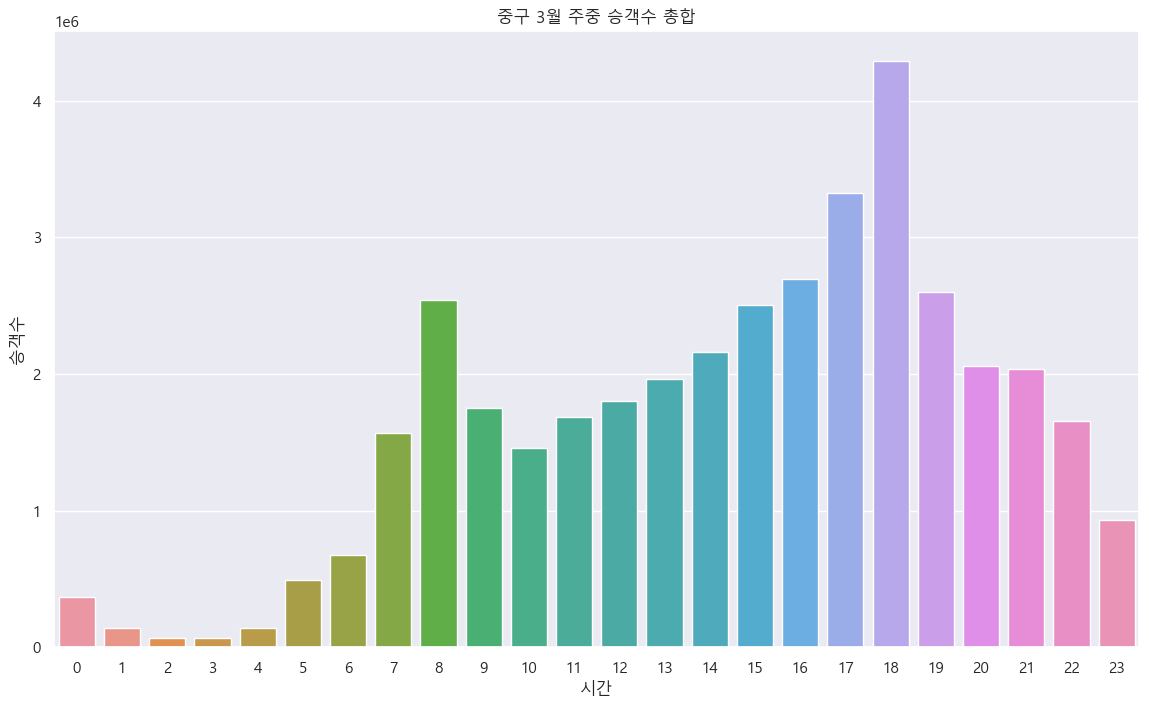

In [42]:
plt.figure(figsize=(14,8))
sns.barplot(data=junggu_3mm[junggu_3mm['wd']==0], x='hh', y='g_cnt', estimator=np.sum, errorbar=('ci', False))
plt.title('중구 3월 주중 승객수 총합')
plt.xlabel('시간')
plt.ylabel('승객수')
plt.show()

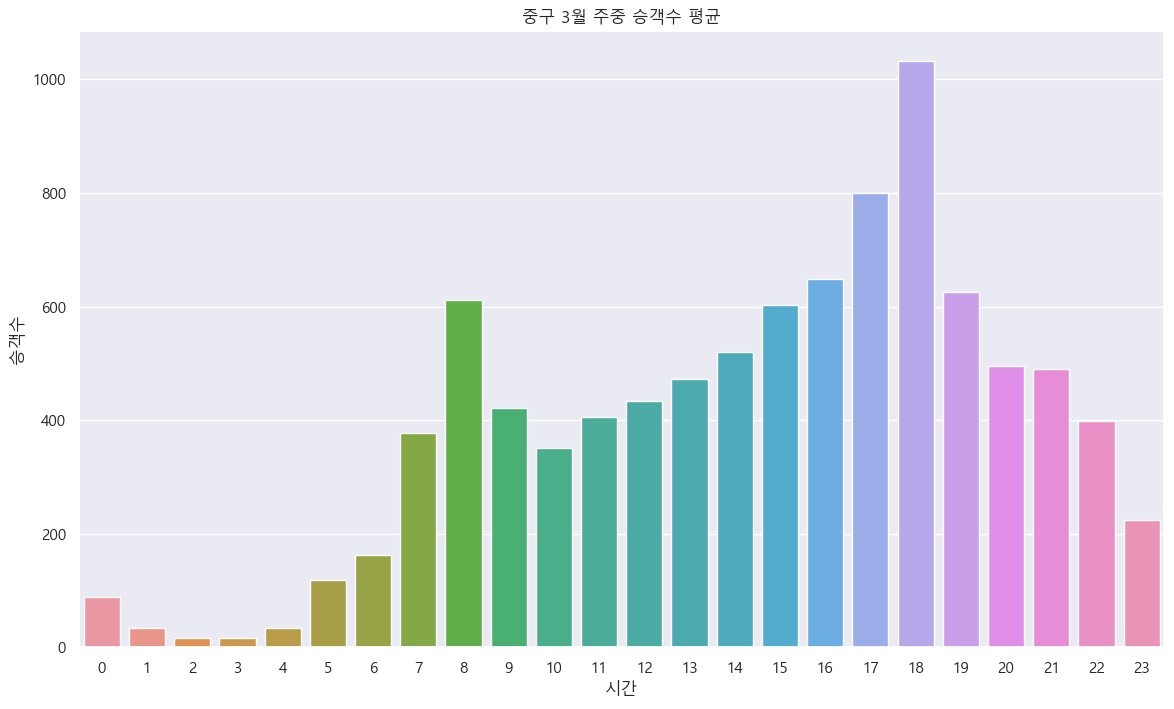

In [43]:
plt.figure(figsize=(14,8))
sns.barplot(data=junggu_3mm[junggu_3mm['wd']==0], x='hh', y='g_cnt', errorbar=('ci', False))
plt.title('중구 3월 주중 승객수 평균')
plt.xlabel('시간')
plt.ylabel('승객수')
plt.show()

In [44]:
junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
junggu_3mm = pd.read_csv('./datasets/버스중구3월.csv')
junggu_3mm_dong_cnt_wd = junggu_3mm[junggu_3mm['wd']==0].groupby('dong_id')[['g_cnt']].mean().reset_index()
junggu_3mm_dong_cnt_wd['g_cnt_log'] =  np.log1p(junggu_3mm_dong_cnt_wd['g_cnt'])

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=junggu_geo,
    data=junggu_3mm_dong_cnt_wd,
    fill_color='GnBu',
    columns=['dong_id', 'g_cnt'],
    key_on='feature.properties.adm_cd')
m

# 중구 3월 주중 로그

‘GnBu’, ‘YlOrRd’.

In [45]:
junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
junggu_3mm = pd.read_csv('./datasets/버스중구3월.csv')
junggu_3mm_dong_cnt_wd = junggu_3mm[junggu_3mm['wd']==0].groupby('dong_id')[['g_cnt']].mean().reset_index()
junggu_3mm_dong_cnt_wd['g_cnt_log'] =  np.log1p(junggu_3mm_dong_cnt_wd['g_cnt'])

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=junggu_geo,
    data=junggu_3mm_dong_cnt_wd,
    fill_color='GnBu',
    columns=['dong_id', 'g_cnt_log'],
    key_on='feature.properties.adm_cd')
m

# 중구 3월 주말 그냥

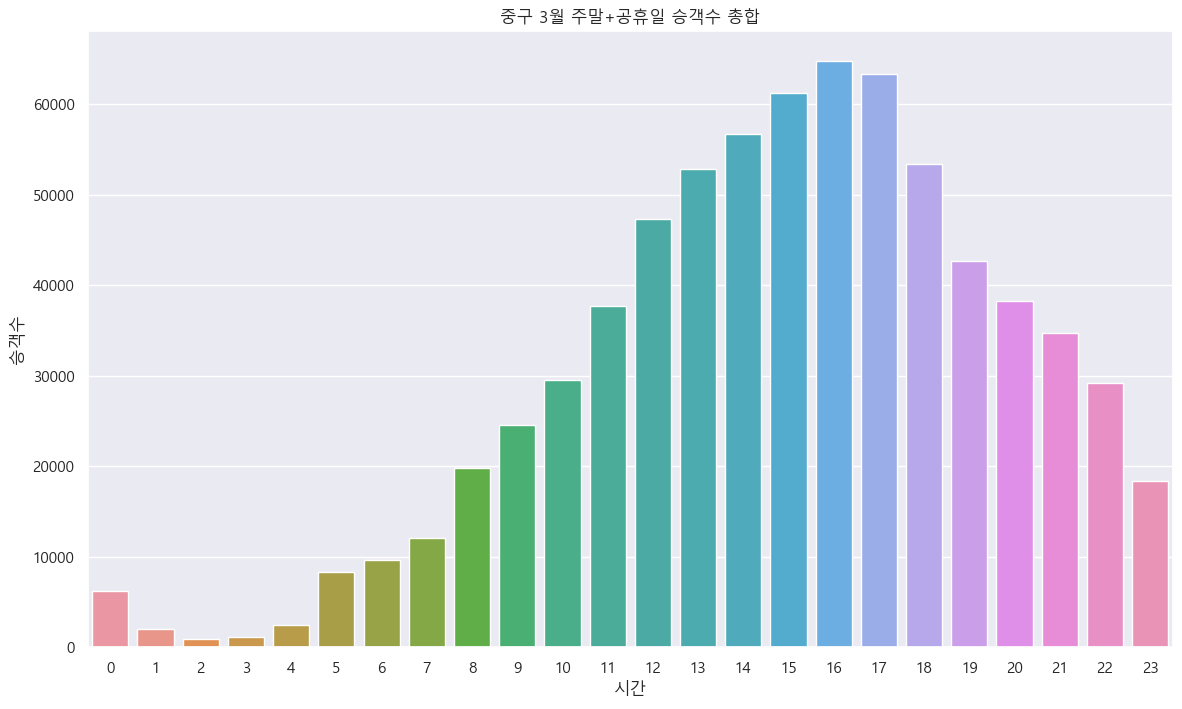

In [46]:
plt.figure(figsize=(14,8))
sns.barplot(data=junggu_3mm[junggu_3mm['wd']==1], x='hh', y='g_cnt', estimator=np.sum, errorbar=('ci', False))
plt.title('중구 3월 주말+공휴일 승객수 총합')
plt.xlabel('시간')
plt.ylabel('승객수')
plt.show()

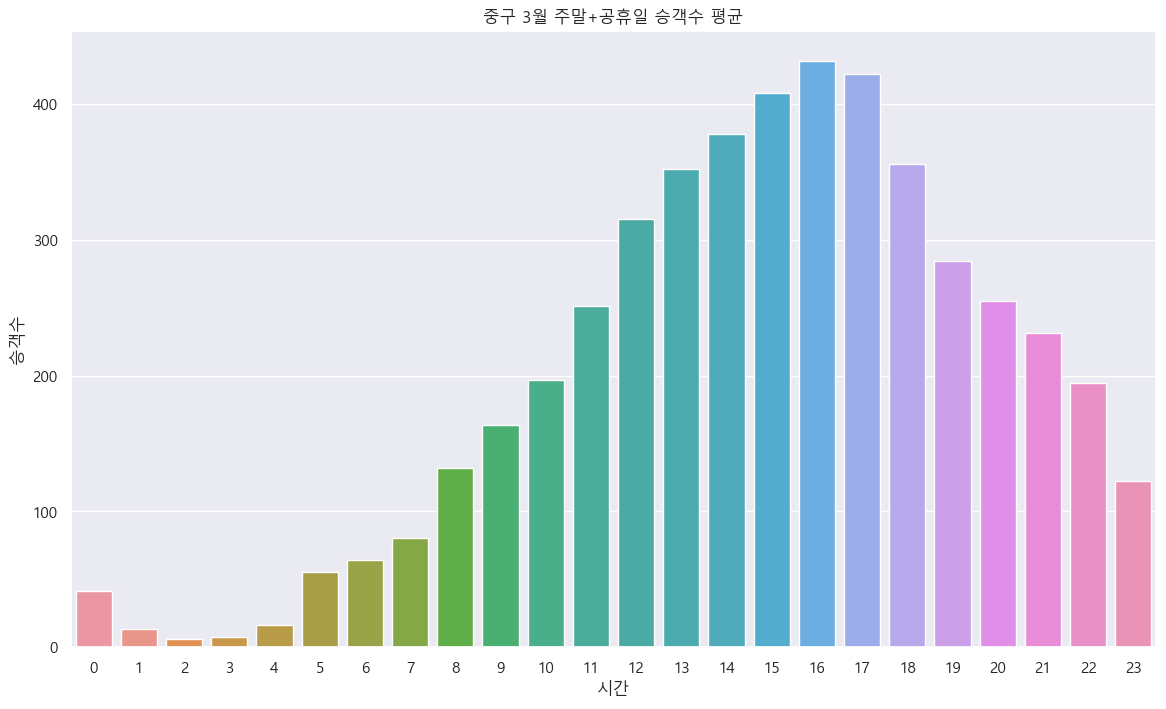

In [47]:
plt.figure(figsize=(14,8))
sns.barplot(data=junggu_3mm[junggu_3mm['wd']==1], x='hh', y='g_cnt', errorbar=('ci', False))
plt.title('중구 3월 주말+공휴일 승객수 평균')
plt.xlabel('시간')
plt.ylabel('승객수')
plt.show()

In [48]:
junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
junggu_3mm = pd.read_csv('./datasets/버스중구3월.csv')
junggu_3mm_dong_cnt_wd = junggu_3mm[junggu_3mm['wd']==1].groupby('dong_id')[['g_cnt']].mean().reset_index()
junggu_3mm_dong_cnt_wd['g_cnt_log'] =  np.log1p(junggu_3mm_dong_cnt_wd['g_cnt'])

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=junggu_geo,
    data=junggu_3mm_dong_cnt_wd,
    fill_color='YlOrRd',
    columns=['dong_id', 'g_cnt'],
    key_on='feature.properties.adm_cd')
m

# 중구 3월 주말 로그

In [49]:
junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
junggu_3mm = pd.read_csv('./datasets/버스중구3월.csv')
junggu_3mm_dong_cnt_wd = junggu_3mm[junggu_3mm['wd']==1].groupby('dong_id')[['g_cnt']].mean().reset_index()
junggu_3mm_dong_cnt_wd['g_cnt_log'] =  np.log1p(junggu_3mm_dong_cnt_wd['g_cnt'])

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=junggu_geo,
    data=junggu_3mm_dong_cnt_wd,
    fill_color='YlOrRd',
    columns=['dong_id', 'g_cnt_log'],
    key_on='feature.properties.adm_cd')
m

# 중구 3월 승객지도 총합

‘GnBu’, ‘YlOrRd’.

In [50]:
junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
중구3월 = pd.read_csv('./datasets/버스중구3월.csv')
중구3월승객총합 = 중구3월.groupby('dong_id')[['g_cnt']].sum().reset_index()

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=junggu_geo,
    data=중구3월승객총합,
    fill_color= 'GnBu',
    columns=['dong_id', 'g_cnt'],
    key_on='feature.properties.adm_cd')
m

# ppt중구 3월 그냥 승객지도 총합 로그

In [51]:
junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
중구3월 = pd.read_csv('./datasets/버스중구3월.csv')
중구3월승객총합 = 중구3월.groupby('dong_id')[['g_cnt']].sum().reset_index()
중구3월승객총합['g_cnt_log'] = np.log1p(중구3월승객총합['g_cnt'])
here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=junggu_geo,
    data=중구3월승객총합,
    columns=['dong_id', 'g_cnt_log'],
    key_on='feature.properties.adm_cd'
)
m

# 중구3월 세분화

In [178]:
중구3월

,busdate,yy,mm,dd,dong_id,guest_cnt,ww,hh,g_cnt,wd,동
0,2022-03-01,2022,3,1,1102073,786,1,0,5,1,동화동
1,2022-03-01,2022,3,1,1102068,2367,1,0,15,1,중림동
2,2022-03-01,2022,3,1,1102059,7777,1,0,94,1,광희동
3,2022-03-01,2022,3,1,1102054,17543,1,0,161,1,회현동
4,2022-03-01,2022,3,1,1102052,15399,1,0,54,1,소공동
...,...,...,...,...,...,...,...,...,...,...,...
11155,2022-03-31,2022,3,31,1102070,3608,3,23,86,0,다산동
11156,2022-03-31,2022,3,31,1102069,4173,3,23,130,0,신당동
11157,2022-03-31,2022,3,31,1102065,5732,3,23,243,0,신당5동
11158,2022-03-31,2022,3,31,1102060,4036,3,23,182,0,을지로동


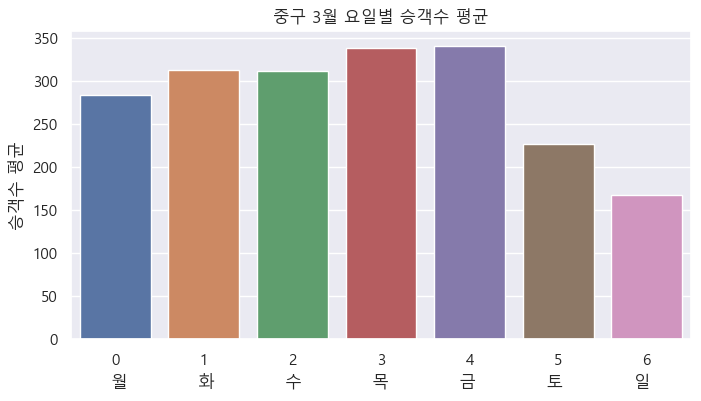

In [179]:
plt.figure(figsize=(8,4))
sns.barplot(data=중구3월, x='ww', y='g_cnt', estimator=np.mean, errorbar=('ci', False))
plt.title('중구 3월 요일별 승객수 평균')
plt.xlabel('월            화            수            목            금            토            일')
plt.ylabel('승객수 평균')
plt.show()

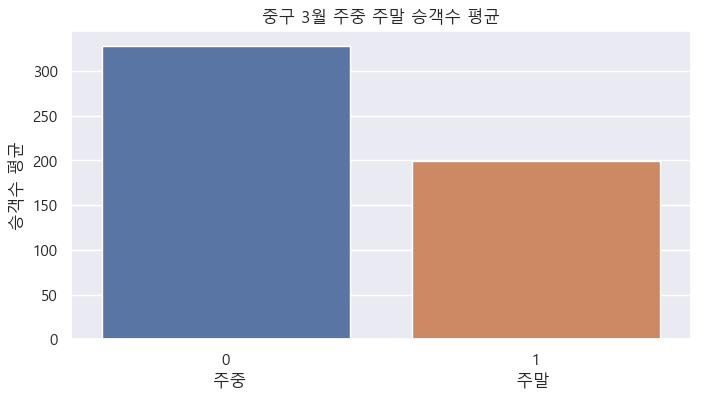

In [110]:
plt.figure(figsize=(8,4))
sns.barplot(data=중구3월, x='wd', y='g_cnt', estimator=np.mean, errorbar=('ci', False))
plt.title('중구 3월 주중 주말 승객수 평균')
plt.xlabel('주중                                              주말')
plt.ylabel('승객수 평균')
plt.show()

In [152]:
중구3월['동'].unique()

array(['동화동', '중림동', '광희동', '회현동', '소공동', '장충동', '필동', '청구동', '약수동',
       '다산동', '신당동', '황학동', '신당5동', '을지로동', '명동'], dtype=object)

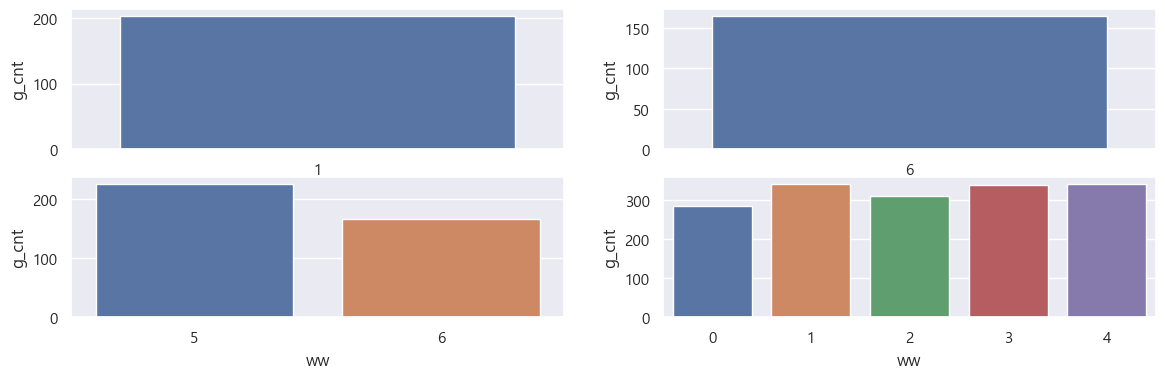

In [175]:
# 삼일절 대선 주말 주중
삼일절 = 중구3월[중구3월['busdate']=='2022-03-01']
대선 = 중구3월[중구3월['busdate']=='2022-03-06']
토일 = 중구3월[(중구3월['ww']==5)|(중구3월['ww']==6)]
주중 = 중구3월[(중구3월['ww']!=5)&(중구3월['ww']!=6)&(중구3월['busdate']!='2022-03-01')&(중구3월['busdate']!='2022-03-06')]
plt.figure(figsize=(14,4))

for i, data in enumerate([삼일절, 대선, 토일, 주중]):
    plt.subplot(2,2,i+1)
    sns.barplot(data=data, x='ww', y='g_cnt', estimator=np.mean, errorbar=('ci', False))

plt.show()

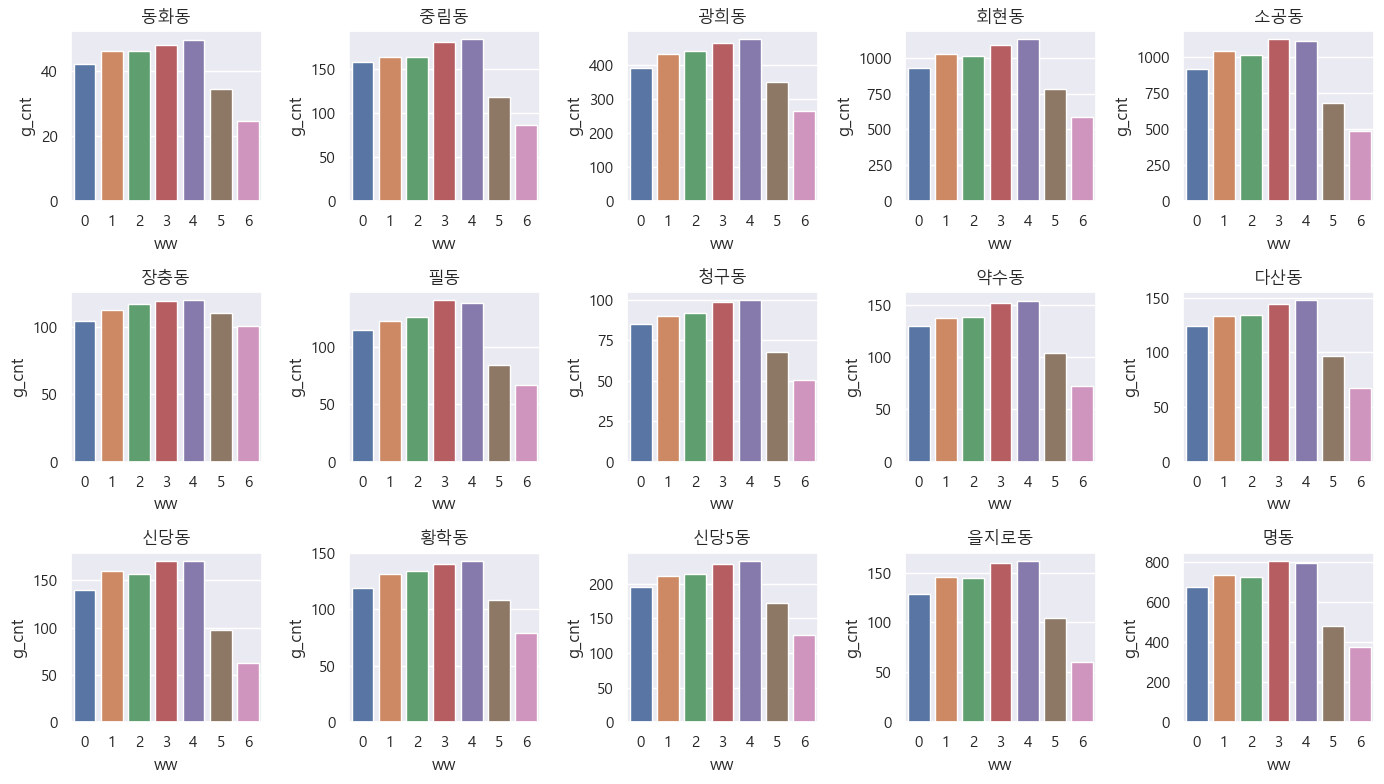

In [174]:
plt.figure(figsize=(14,8))

for i, data in enumerate(중구3월['동'].unique().tolist()):
    plt.subplot(3,5,i+1)
    plt.title(data)
    plt.xlabel(data+'요일')
    plt.ylabel('승객수 평균')
    sns.barplot(data=중구3월[중구3월['동']==data], x='ww', y='g_cnt', estimator=np.mean, errorbar=('ci', False))

plt.tight_layout()
plt.show()

# 송파 3월 주중 총합 이용률 맵

In [52]:
서울_geojson = gpd.read_file('./datasets/seoul_geo_dong.geojson')

In [53]:
서울_geojson.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3516 entries, 0 to 3515
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  3516 non-null   int64   
 1   adm_nm    3516 non-null   object  
 2   adm_cd    3516 non-null   object  
 3   adm_cd2   3516 non-null   object  
 4   sgg       3516 non-null   object  
 5   sido      3516 non-null   object  
 6   sidonm    3516 non-null   object  
 7   temp      3516 non-null   object  
 8   sggnm     3516 non-null   object  
 9   adm_cd8   3516 non-null   object  
 10  geometry  3516 non-null   geometry
dtypes: geometry(1), int64(1), object(9)
memory usage: 302.3+ KB


In [54]:
songpa_geo = 서울_geojson[서울_geojson['sggnm']=='송파구']
gangnam_geo = 서울_geojson[서울_geojson['sggnm']=='강남구']


In [55]:
# 송파구 GEO파일 만들기

# with open('C:\\AI\\pythonProject\\venv\\lecture\\semipjt\\datasets\\songpa_geo.geojson', 'w') as f:
#     f.write(songpa_geo.to_json(drop_id=True))

In [56]:
# 강남구 GEO파일 만들기

# with open('C:\\AI\\pythonProject\\venv\\lecture\\semipjt\\datasets\\gangnam_geo.geojson', 'w') as f:
#     f.write(gangnam_geo.to_json(drop_id=True))

In [57]:
# 강남3월 파일 만들기

# 강남3월 = b24[(b24['dong_id']//100==11230)&(b24['mm']==3)]
# 강남3월.to_csv('./datasets/버스강남3월.csv', index=False)

# 송파 강남 맵

In [58]:
songpa_geo = gpd.read_file('./datasets/songpa_geo.geojson')
b24[(b24['dong_id']//100==11240)&(b24['mm']==3)].to_csv('./datasets/버스송파3월.csv', index=False)
송파3월 = pd.read_csv('./datasets/버스송파3월.csv')
송파3월승객총합 = 송파3월.groupby('dong_id')[['g_cnt']].sum().reset_index()

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(songpa_geo).add_to(m)

m.choropleth(
    geo_data=songpa_geo,
    data=송파3월승객총합,
    fill_color= 'YlOrRd',
    columns=['dong_id', 'g_cnt'],
    key_on='feature.properties.adm_cd')
m

In [59]:
gangnam_geo = gpd.read_file('./datasets/gangnam_geo.geojson')

강남3월 = pd.read_csv('./datasets/버스강남3월.csv')
강남3월승객총합 = 강남3월.groupby('dong_id')[['g_cnt']].sum().reset_index()
mod_idx = 강남3월승객총합[강남3월승객총합['dong_id']==1123074].index[0]
강남3월승객총합.at[15,'dong_id'] = 1123081

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(gangnam_geo).add_to(m)

m.choropleth(
    geo_data=gangnam_geo,
    data=강남3월승객총합,
    fill_color= 'YlOrRd',
    columns=['dong_id', 'g_cnt'],
    key_on='feature.properties.adm_cd')
m

# 송파 그래프

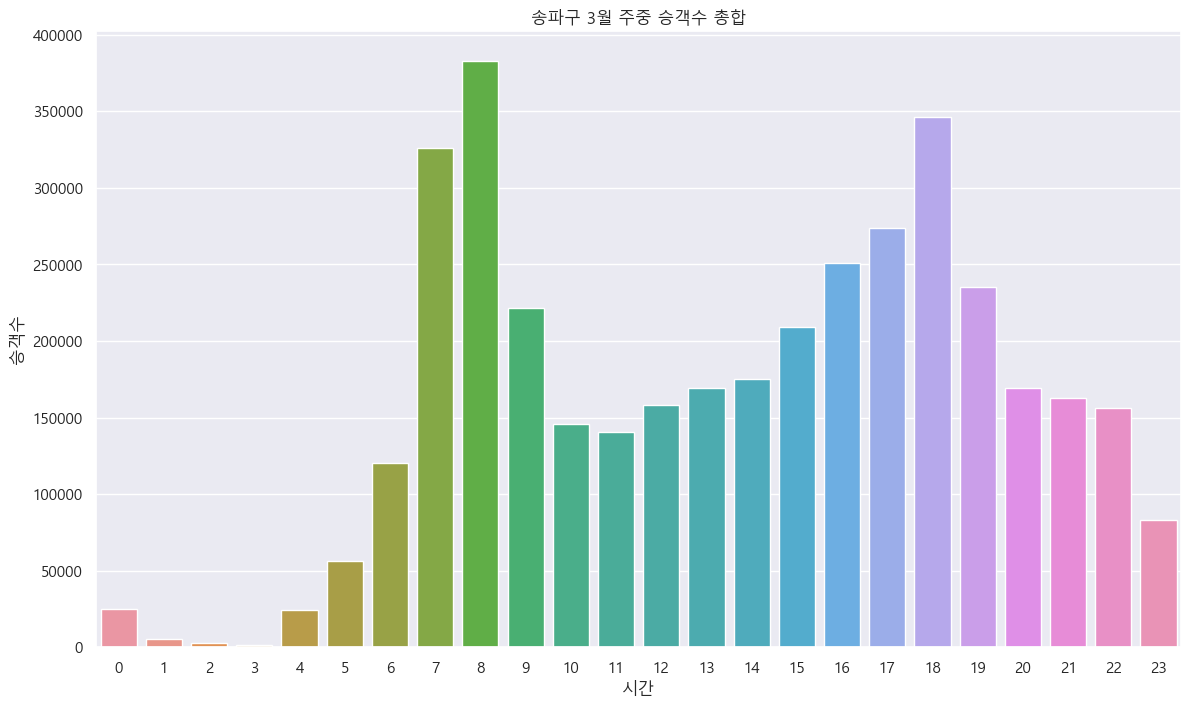

In [60]:
plt.figure(figsize=(14,8))
sns.barplot(data=bus_songpa_3month[bus_songpa_3month['wd']==0], x='hh', y='g_cnt', estimator=np.sum, errorbar=('ci', False))
plt.title('송파구 3월 주중 승객수 총합')
plt.xlabel('시간')
plt.ylabel('승객수')
plt.show()

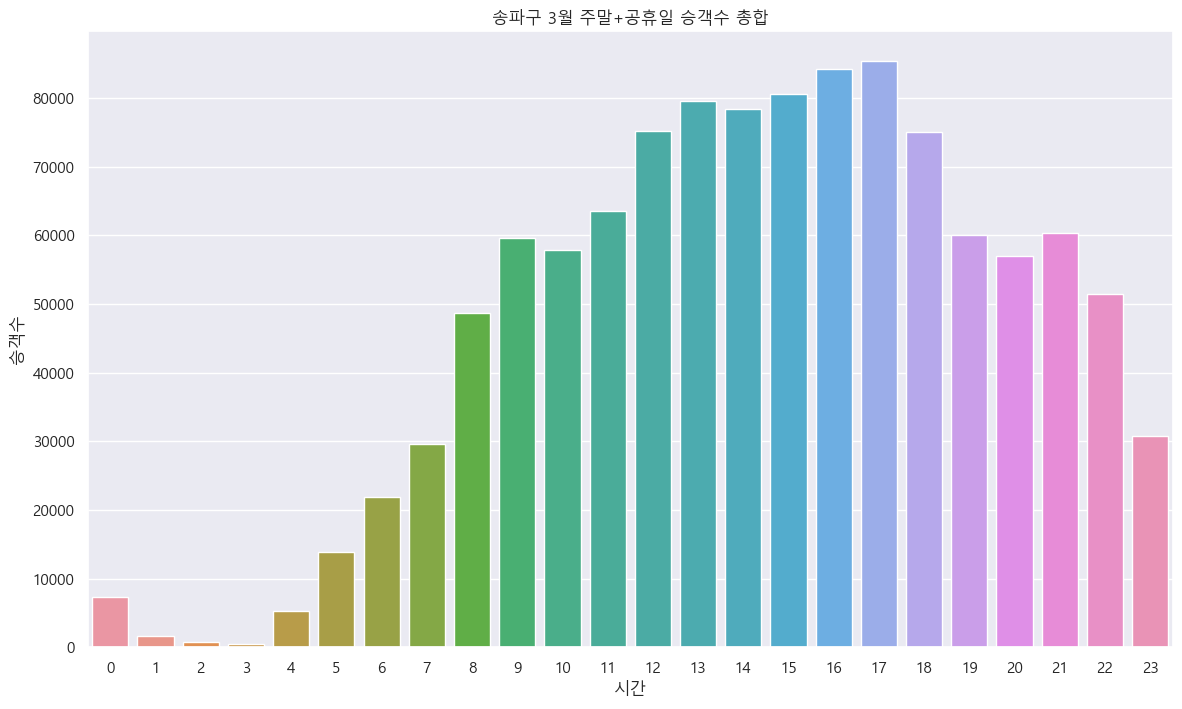

In [61]:
plt.figure(figsize=(14,8))
sns.barplot(data=bus_songpa_3month[bus_songpa_3month['wd']==1], x='hh', y='g_cnt', estimator=np.sum, errorbar=('ci', False))
plt.title('송파구 3월 주말+공휴일 승객수 총합')
plt.xlabel('시간')
plt.ylabel('승객수')
plt.show()

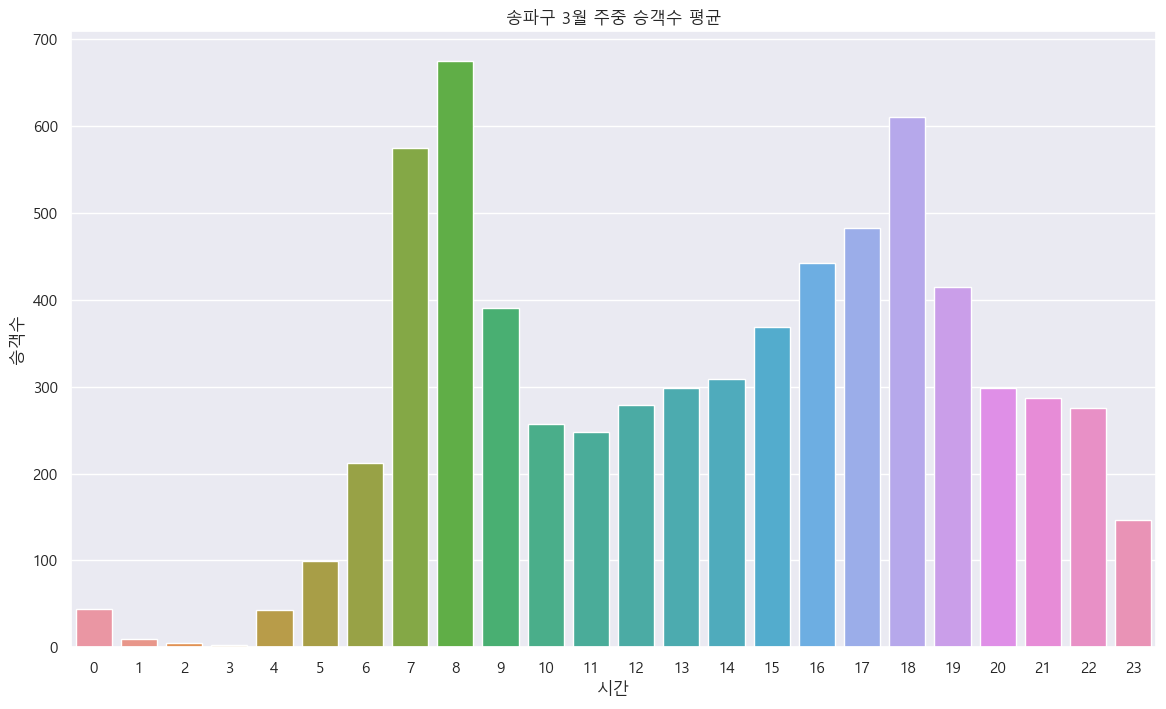

In [62]:
plt.figure(figsize=(14,8))
sns.barplot(data=bus_songpa_3month[bus_songpa_3month['wd']==0], x='hh', y='g_cnt', errorbar=('ci', False))
plt.title('송파구 3월 주중 승객수 평균')
plt.xlabel('시간')
plt.ylabel('승객수')
plt.show()

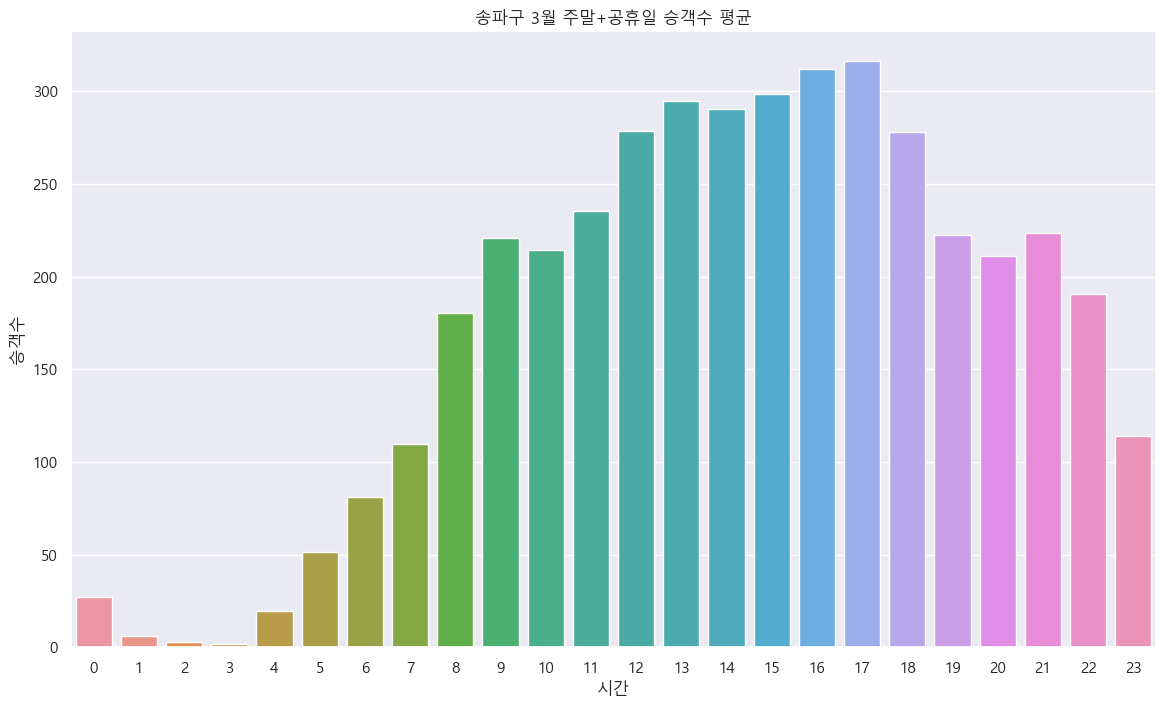

In [63]:
plt.figure(figsize=(14,8))
sns.barplot(data=bus_songpa_3month[bus_songpa_3month['wd']==1], x='hh', y='g_cnt', errorbar=('ci', False))
plt.title('송파구 3월 주말+공휴일 승객수 평균')
plt.xlabel('시간')
plt.ylabel('승객수')
plt.show()

# 강남 그래프

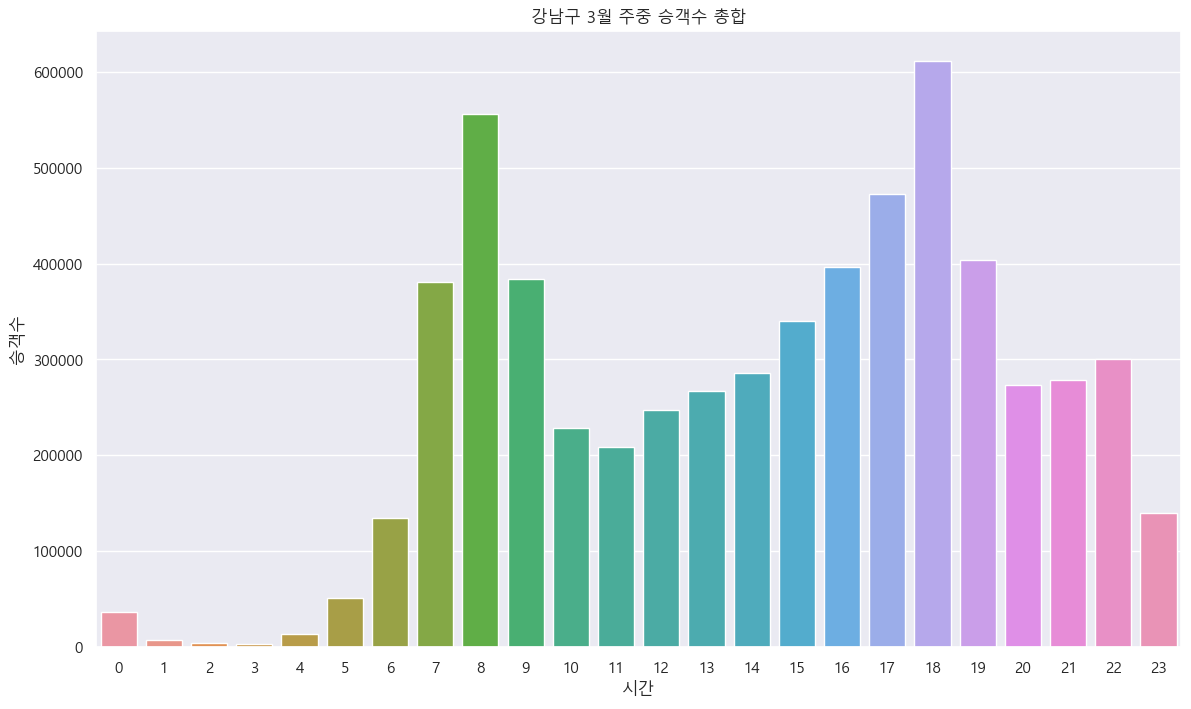

In [64]:
plt.figure(figsize=(14,8))
sns.barplot(data=bus_gangnam_3month[bus_gangnam_3month['wd']==0], x='hh', y='g_cnt', estimator=np.sum, errorbar=('ci', False))
plt.title('강남구 3월 주중 승객수 총합')
plt.xlabel('시간')
plt.ylabel('승객수')
plt.show()

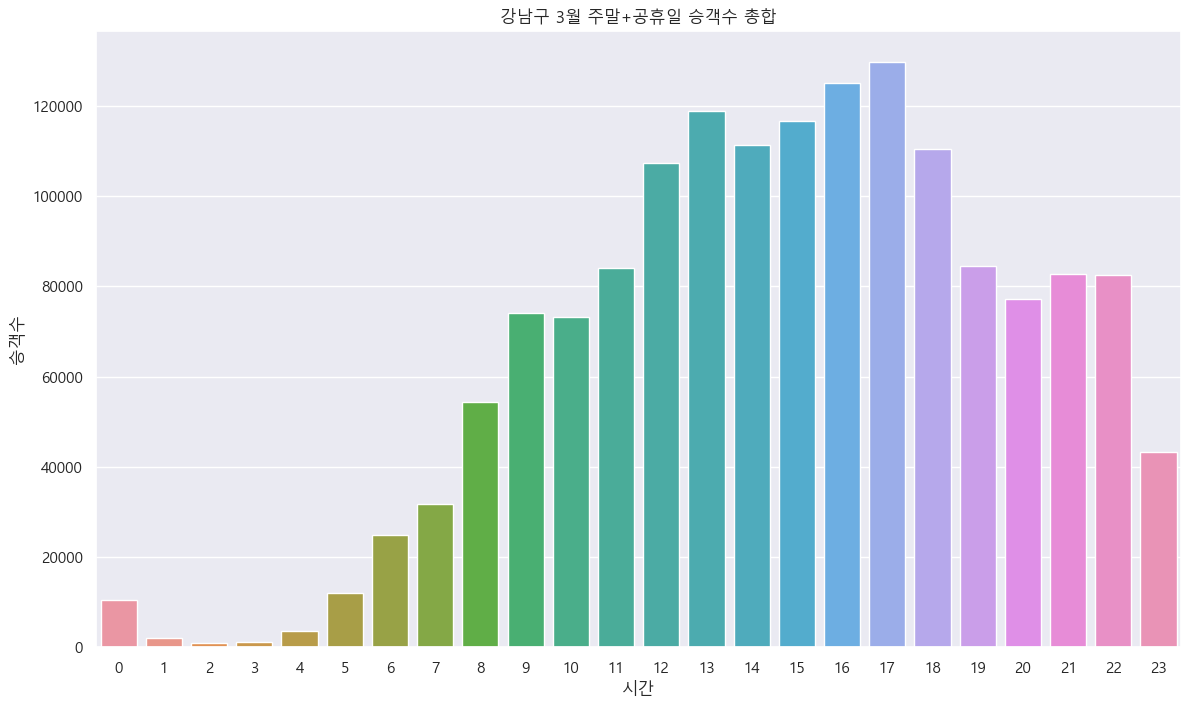

In [65]:
plt.figure(figsize=(14,8))
sns.barplot(data=bus_gangnam_3month[bus_gangnam_3month['wd']==1], x='hh', y='g_cnt', estimator=np.sum, errorbar=('ci', False))
plt.title('강남구 3월 주말+공휴일 승객수 총합')
plt.xlabel('시간')
plt.ylabel('승객수')
plt.show()

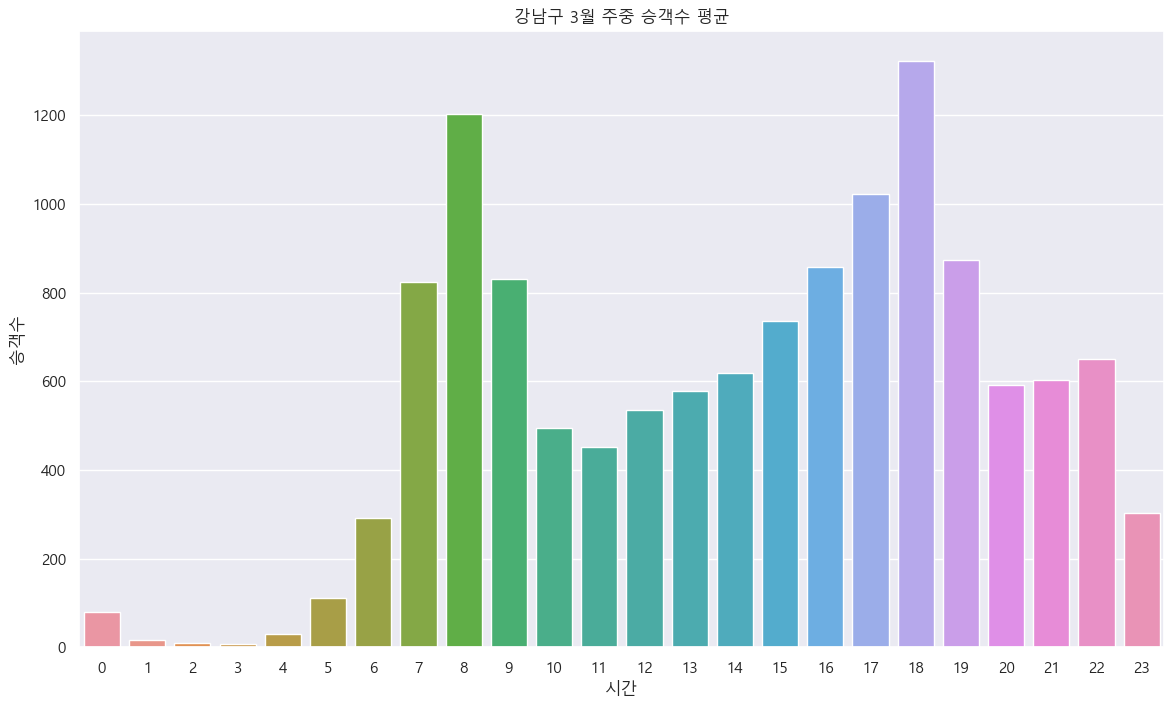

In [66]:
plt.figure(figsize=(14,8))
sns.barplot(data=bus_gangnam_3month[bus_gangnam_3month['wd']==0], x='hh', y='g_cnt', errorbar=('ci', False))
plt.title('강남구 3월 주중 승객수 평균')
plt.xlabel('시간')
plt.ylabel('승객수')
plt.show()

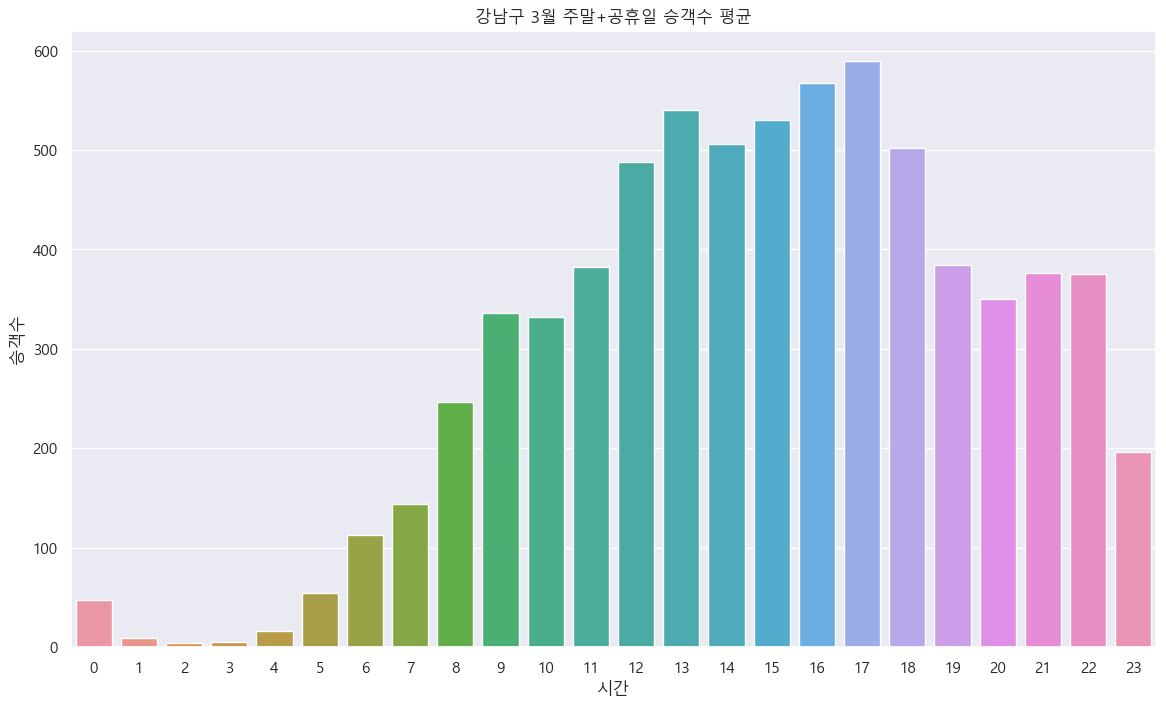

In [67]:
plt.figure(figsize=(14,8))
sns.barplot(data=bus_gangnam_3month[bus_gangnam_3month['wd']==1], x='hh', y='g_cnt', errorbar=('ci', False))
plt.title('강남구 3월 주말+공휴일 승객수 평균')
plt.xlabel('시간')
plt.ylabel('승객수')
plt.show()

# 중구 3월 인구로 나눈 승객지도

In [68]:
junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
서울인구 = pd.read_csv('./datasets/gu_dong_population_2022_03.csv', encoding='cp949')
중구인구 = 서울인구[서울인구['구별']=='중구']
중구인구['코드'] = ['1102052','1102054','1102055','1102057','1102058','1102059','1102060','1102065','1102067','1102068','1102069','1102070','1102071','1102072','1102073']
중구인구['소계'] = 중구인구['소계'].str.replace(',', '').astype('int')
중구인구['코드'] = 중구인구['코드'].astype('int')
중구3월 = pd.read_csv('./datasets/버스중구3월.csv')
중구3월동별총합 = 중구3월.groupby('dong_id')[['g_cnt']].sum().reset_index()
중구3월동별총합['코드'] = 중구3월동별총합['dong_id']
중구인구_승객 = pd.merge(중구인구, 중구3월동별총합, how='inner', on='코드')
중구인구_승객['인구당승객'] = 중구인구_승객['g_cnt']/중구인구_승객['소계']
중구동별인구당승객 = 중구인구_승객[['dong_id','인구당승객']]

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=junggu_geo,
    data=중구동별인구당승객,
    fill_color= 'GnBu',
    columns=['dong_id', '인구당승객'],
    key_on='feature.properties.adm_cd')
m

# 중구 3월, 강남 3월, 송파 3월 인구별 스캐터플롯
junggu_3mm.shape
gangnam_3mm.shape
songpa_3mm.shape

In [69]:
seoul_pop = pd.read_csv('./datasets/gu_dong_population_2022_03.csv', encoding='cp949')
target_pop = seoul_pop[seoul_pop['구별'].isin(['송파구','강남구','중구'])]
target_pop['소계'] = target_pop['소계'].str.replace(',','').astype('int')

mydong = pd.read_csv('./datasets/my_dong_code.csv', encoding='cp949')
# replace_idx = mydong[mydong['동별']=='일원2동'].index.values[0]
# mydong.at[replace_idx,'코드']=1123081

target_pop_dong_code = pd.merge(target_pop, mydong, how='left', left_on='동별', right_on='동별')
target_pop_dong_code = target_pop_dong_code[['구별_x', '동별','소계','코드']]
target_pop_dong_code['구코드'] = target_pop_dong_code['코드']//100

target_3mm = bus[(bus['구이름'].isin(['송파구','강남구','중구']))&(bus['mm']==3)]
target_3mm_groupby_dong = target_3mm.groupby('dong_id')[['g_cnt']].sum().reset_index()
target = pd.merge(target_pop_dong_code, target_3mm_groupby_dong, how='left', left_on='코드', right_on='dong_id')
target.rename(columns={'구별_x':'구', '동별':'동', '소계':'인구합계', 'g_cnt':'버스이용총합'}, inplace=True)
# target.drop('dong_id', axis=0, inplace=True)
target['이용합div인구']=target['버스이용총합']/target['인구합계']
target

,구,동,인구합계,코드,구코드,dong_id,버스이용총합,이용합div인구
0,중구,소공동,3423,1102052,11020,1102052,688691,201.195150
1,중구,회현동,5394,1102054,11020,1102054,705555,130.803671
2,중구,명동,3726,1102055,11020,1102055,496049,133.131777
3,중구,필동,4630,1102057,11020,1102057,85316,18.426782
4,중구,장충동,5301,1102058,11020,1102058,83509,15.753443
...,...,...,...,...,...,...,...,...
59,송파구,잠실7동,9536,1124078,11240,1124078,111071,11.647546
60,송파구,잠실2동,34989,1124079,11240,1124079,103100,2.946640
61,송파구,잠실3동,34347,1124080,11240,1124080,441175,12.844644
62,송파구,장지동,29471,1124081,11240,1124081,264581,8.977673


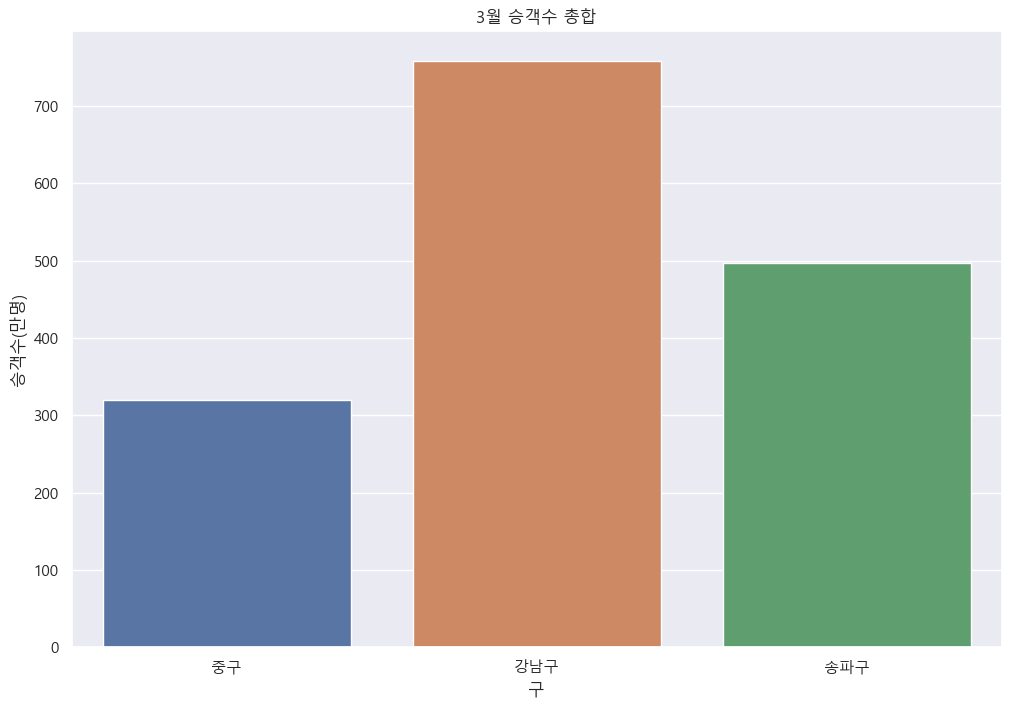

In [70]:
# 그 구들 승객총합 바플롯
target_gu_sum = target.groupby('구')[['버스이용총합', '인구합계']].sum().reset_index()
target_gu_sum['버스이용총합div만'] = target_gu_sum['버스이용총합']/10000
target_gu_sum
plt.figure(figsize=(12,8))
sns.barplot(data=target_gu_sum, x='구', y='버스이용총합div만', order = ['중구', '강남구', '송파구'])
plt.title('3월 승객수 총합')
plt.xlabel('구')
plt.ylabel('승객수(만명)')
# plt.savefig('./qqq')
plt.show()

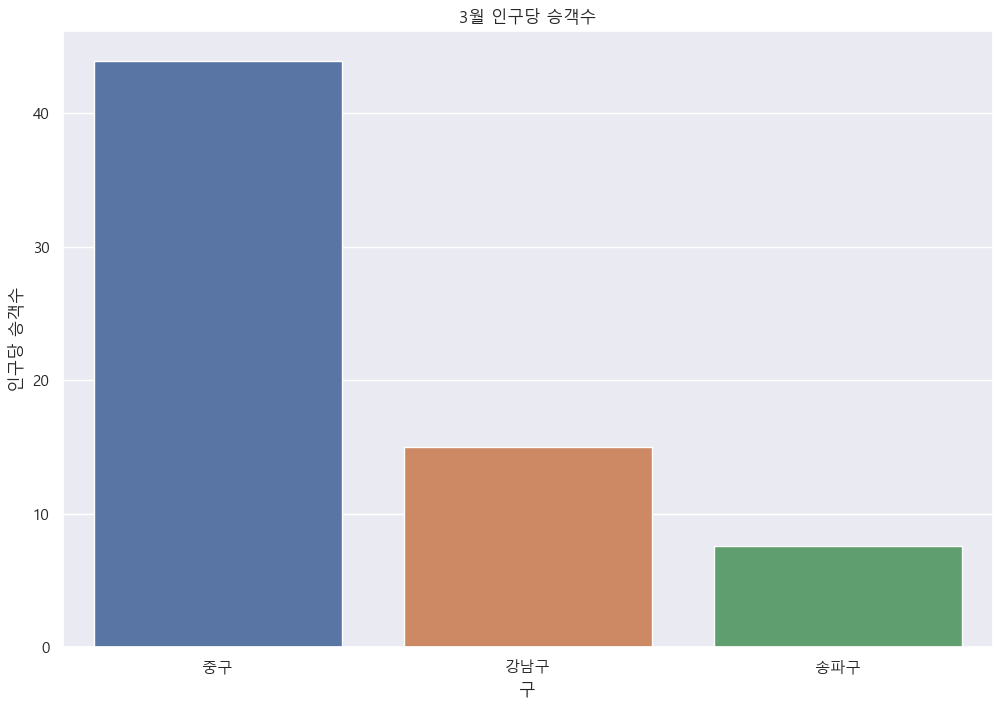

In [71]:
# 그 구귿 인구당 승객총합 바플롯
plt.figure(figsize=(12,8))
sns.barplot(data=target, x='구', y='이용합div인구', errorbar=('ci',False), order = ['중구', '강남구', '송파구'])
plt.title('3월 인구당 승객수')
plt.xlabel('구')
plt.ylabel('인구당 승객수')
# plt.savefig('./fffff')
plt.show()

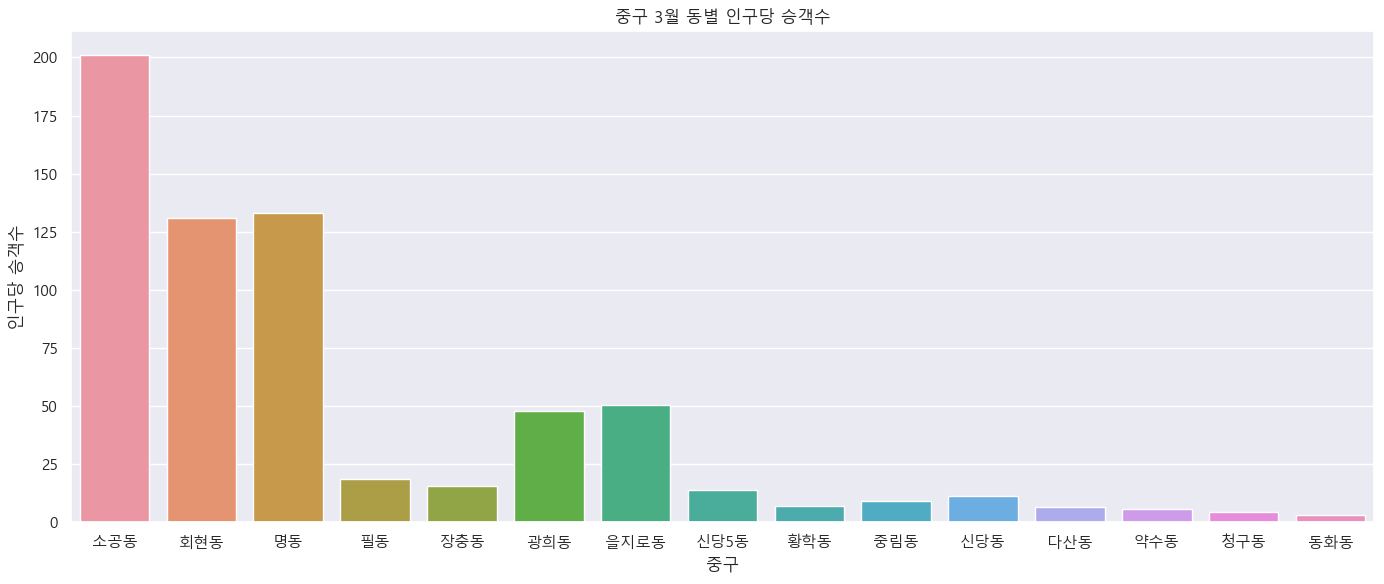

In [72]:
plt.figure(figsize=(14,6))
sns.barplot(data=target[target['구']=='중구'], x='동', y='이용합div인구')
plt.title('중구 3월 동별 인구당 승객수')
plt.xlabel('중구')
plt.ylabel('인구당 승객수')
plt.tight_layout()
plt.show()

# 중구 강남 송파 인구로 나눈 맵 11020, 11230, 11240

In [73]:
junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
gangnam_geo = gpd.read_file('./datasets/gangnam_geo.geojson')
songpa_geo = gpd.read_file('./datasets/songpa_geo.geojson')
target_geo = pd.concat([pd.concat([junggu_geo,gangnam_geo]),songpa_geo])

서울인구 = pd.read_csv('./datasets/gu_dong_population_2022_03.csv', encoding='cp949')
동코드 = pd.read_csv('./datasets/my_dong_code.csv', encoding='cp949')
타겟인구 = 서울인구[서울인구['구별'].isin(['중구', '강남구', '송파구'])]
target_gu = pd.merge(타겟인구, 동코드[['동별','코드']], how='left', on='동별')
target_gu['소계'] = target_gu['소계'].str.replace(',', '').astype('int')
target_bus = b24[(b24['dong_id']//100==11020)|(b24['dong_id']//100==11230)|(b24['dong_id']//100==11240)]
target_tot = target_bus.groupby('dong_id')['g_cnt'].sum().reset_index()
target = pd.merge(target_gu, target_tot, how='left', left_on='코드', right_on='dong_id')
target['cnt_div_pop'] = target['g_cnt'] // target['소계']
target.at[30,'dong_id'] = 1123081

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=target_geo,
    data=target,
    columns=['dong_id', 'cnt_div_pop'],
    key_on='feature.properties.adm_cd')
m

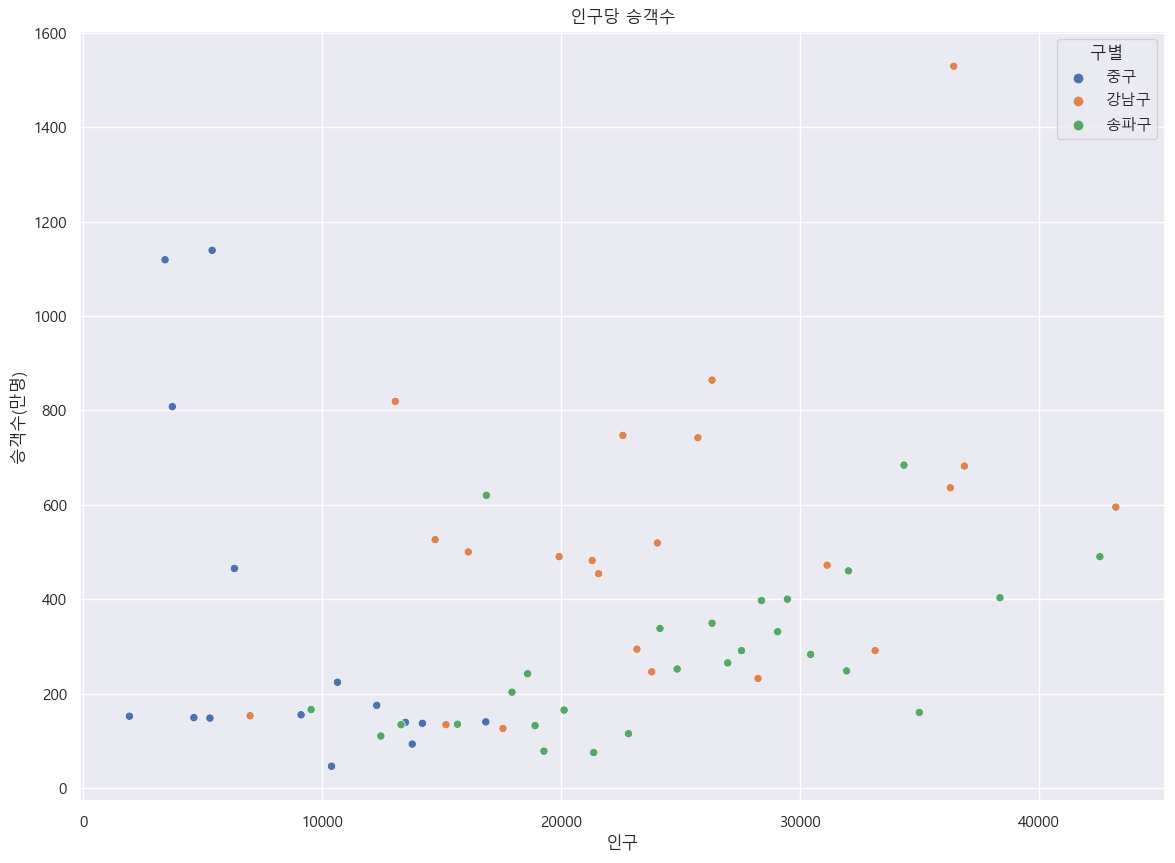

In [74]:
plt.figure(figsize=(14,10))
target['cnt_div_10000'] = target['g_cnt']//10000
sns.scatterplot(data=target, x='소계', y='cnt_div_10000', hue='구별')
plt.title('인구당 승객수')
plt.xlabel('인구')
plt.ylabel('승객수(만명)')
plt.show()

# 중구 강남 송파 박스플롯

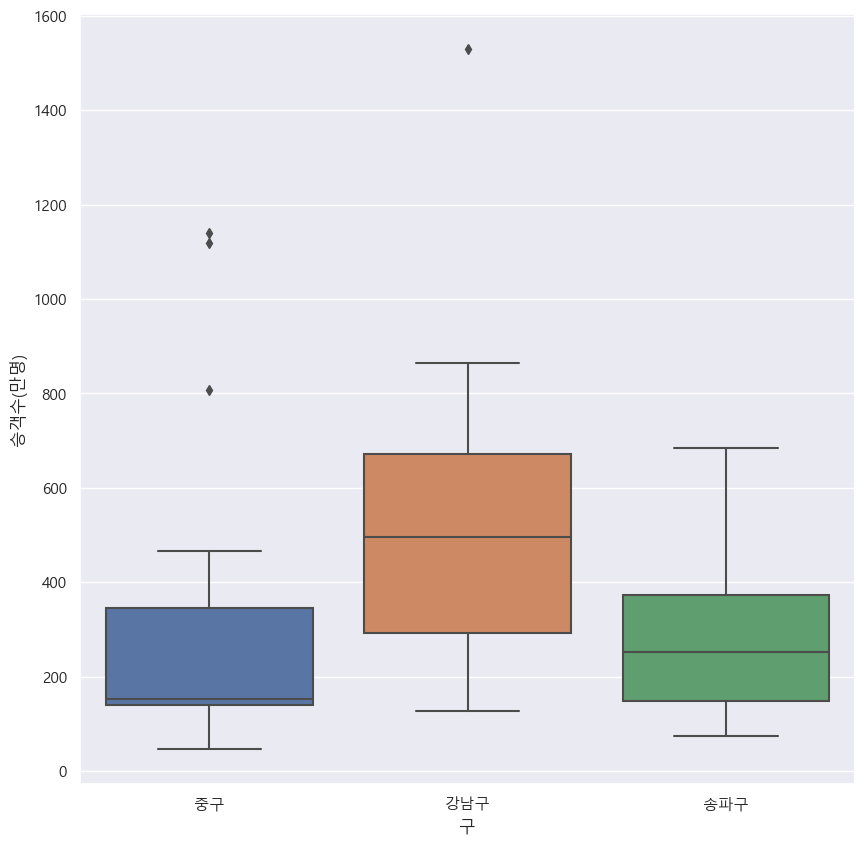

In [75]:
plt.figure(figsize=(10,10))
sns.boxplot(data=target, x='구별', y='cnt_div_10000', order = ['중구', '강남구', '송파구'])
plt.xlabel('구')
plt.ylabel('승객수(만명)')
plt.show()

In [76]:
target[ ((target['구별']=='중구')&(target['cnt_div_10000']>=800)) | ((target['구별']=='강남구')&(target['cnt_div_10000']>=1400)) ][['구별', '동별','cnt_div_10000']]

,구별,동별,cnt_div_10000
0,중구,소공동,1119
1,중구,회현동,1139
2,중구,명동,808
22,강남구,역삼1동,1529


# 그 구들 그외 플롯

In [79]:
target

,구별,동별,소계,남자,여자,코드,dong_id,g_cnt,cnt_div_pop,cnt_div_10000
0,중구,소공동,3423,"1,739","1,684",1102052,1102052,11197759,3271,1119
1,중구,회현동,5394,"2,793","2,601",1102054,1102054,11396064,2112,1139
2,중구,명동,3726,"1,654","2,072",1102055,1102055,8083132,2169,808
3,중구,필동,4630,"2,365","2,265",1102057,1102057,1491106,322,149
4,중구,장충동,5301,"2,711","2,590",1102058,1102058,1489059,280,148
...,...,...,...,...,...,...,...,...,...,...
59,송파구,잠실7동,9536,"4,444","5,092",1124078,1124078,1660530,174,166
60,송파구,잠실2동,34989,"16,724","18,265",1124079,1124079,1609248,45,160
61,송파구,잠실3동,34347,"16,379","17,968",1124080,1124080,6846341,199,684
62,송파구,장지동,29471,"14,225","15,246",1124081,1124081,4007617,135,400


ValueError: Boolean array expected for the condition, not object

<Figure size 1200x1200 with 0 Axes>

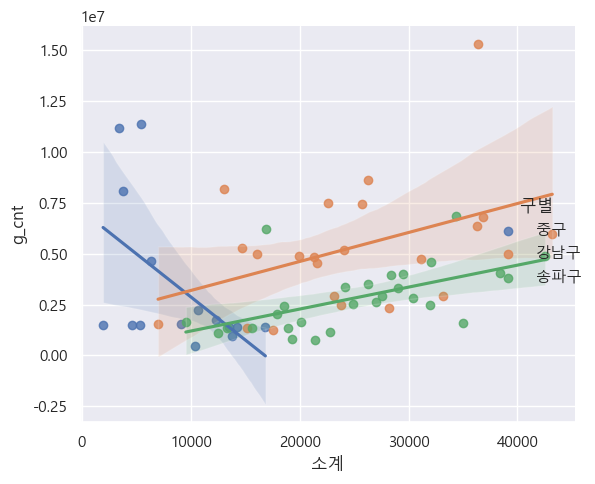

In [89]:
plt.figure(figsize=(12,12))
sns.lmplot(data=target, x="소계", y="g_cnt", hue="구별")
plt.tight_layout()
plt.show()

# 01 순환버스

In [77]:
busnum_busstop = pd.read_csv('./datasets/busnum_busstop_lat_lng_2022.csv', encoding='cp949')
busbum_01 = busnum_busstop[busnum_busstop['노선명']=='01']
busbum_01

,ROUTE_ID,노선명,순번,NODE_ID,ARS-ID,정류소명,X좌표,Y좌표
40,100100001,01,1,101000331,2291,남산예장버스환승주차장,126.989311,37.559200
41,100100001,01,2,101000053,2152,퇴계로3가.한옥마을.한국의집,126.992491,37.560990
42,100100001,01,3,101000054,2153,충무로역2번출구.대한극장앞,126.994883,37.561320
43,100100001,01,4,101000103,2207,퇴계로5가,126.999930,37.562480
44,100100001,01,5,101000293,2288,장충문화체육센터.권기옥활동터,127.002722,37.560181
45,100100001,01,6,101000117,2222,동대입구역.장충동,127.005433,37.558119
46,100100001,01,7,101000106,2210,국립극장.반얀트리호텔,127.001041,37.551616
47,100100001,01,8,101000149,2254,남산북측순환로입구,126.998808,37.550695
48,100100001,01,9,102000226,3320,남산서울타워,126.990443,37.551157
49,100100001,01,10,102000316,3347,남산도서관,126.981814,37.552265
